In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Previous cell doesn't add this, so done manually
sys.path.append('C:\\Users\\bde2002.53381\\Desktop\\master-thesis')

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import random
from datetime import date
import datetime as DT
from datetime import datetime
import plotly.graph_objects as go
from sklearn.pipeline import Pipeline
from collections import Counter
from matplotlib import pyplot
from sklearn.model_selection import StratifiedKFold

from quality_evaluation.predictive_metrics import *

In [4]:
## Assuming that data is prepared:
# - target variable is added and last column
# - variables are added (age) and removed (dates, vital status)
# - categorical variables are encoded appropriatley (ordinal vs nominal)
# - missing values are handled appropriately
# - dummy columns to be dropped are specified outside of function or during preparation

In [5]:
# Load the original and validation dataframes
df_ori = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_ori_2_binned_p.csv") # This is the original data WITHOUT the holdout validation set
df_ori_val = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\df_val_2_binned_p.csv")

In [6]:
epsilon_names = ['10','1','0_1','0_01','0_001']
ms_privacy_levels = []
pb_privacy_levels = []

g = globals()

# The following cells lead to a list (e.g. syn_10) with all the versions of that privacy level, 
# and then to a list privacy_levels that contains all these sublists of the different privay levels with their versions

In [7]:
# Load ms dataframes for dataset 2
for epsilon in epsilon_names:
    syn_name = 'ms_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\ms\\ms_df_syn_2_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    ms_privacy_levels.append(g[syn_name])

In [8]:
# Load pb dataframes for dataset 2
for epsilon in epsilon_names:
    syn_name = 'pb_syn_{}'.format(epsilon)
    g[syn_name] = []
    for versie in range(1,6):
        df = pd.read_csv("C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\data\\data_prepared_for_predictive_metrics\\pb\\pb_df_syn_2_e{}_v{}_p.csv".format(epsilon, versie))
        g[syn_name].append(df)
    pb_privacy_levels.append(g[syn_name])

In [9]:
# Dropdummies and num_vars should be specified or can be left None if already taken care of during preperation
dropdummies = ['stage_2A', 'subloc_7', "diagnosis_age_71-90", "lymph_pos_0"]
num_vars = ['tum_differentiatiegraad_code', 'pat_geslacht_code']
models = [LogisticRegression(), DecisionTreeClassifier()]

In [10]:
LRscores, DTscores = FIDbenchmarking(models, df_ori, dropdummies=None, num_vars=num_vars)

fold 1
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
model LogisticRegression()
best parameters: LogisticRegression(C=1, max_iter=4000)
mean 0.7585979463909422
std 0.006358017070783704
model DecisionTreeClassifier()
best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
mean 0.6988977580043059
std 0.007493325108418383
fold 2
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
model LogisticRegression(C=1, max_iter=4000)
best parameters: LogisticRegression(C=100, max_iter=4000)
mean 0.7496099543883658
std 0.004757644866096177
model DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
best parameters: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
mean 0.695728455558592
std 0.009883764659553346
fold 3
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
model LogisticRegression(C=100, max_it

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
diagnosis_age_0-20 present in original data, thus added to validation data with value 0
ori: LogisticRegression(C=1, max_iter=4000)
accuracy of original model is 0.6175825007568877
Feature: pat_geslacht_code Score: 0.12195
Feature: tum_differentiatiegraad_code Score: 0.09789
Feature: subloc_0 Score: 0.01982
Feature: subloc_2 Score: 0.04114
Feature: subloc_3 Score: 0.02126
Feature: subloc_4 Score: 0.01126
Feature: subloc_5 Score: 0.01181
Feature: subloc_6 Score: 0.00673
Feature: subloc_7 Score: 0.11393
Feature: subloc_8 Score: 0.00791
Feature: subloc_9 Score: 0.02051
Feature: stage_1 Score: 0.79810
Feature: stage_2 Score: 0.47386
Feature: stage_2A Score: 0.73681
Feature: stage_2B Score: 0.17041
Feature: stage_2C Score: 0.06630
Feature: stage_3 Score: 0.20728
Feature: stage_3A Score: 0.19671
Feature: stage_3B Score: 0.34886
Feature: stage_3C Score: 0.04840
Feature: stage_

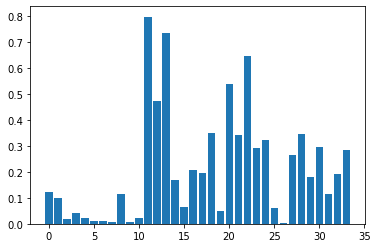

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=0.0001, max_iter=4000)
Feature: pat_geslacht_code Score: 0.00012
Feature: tum_differentiatiegraad_code Score: 0.00014
Feature: subloc_0 Score: 0.00424
Feature: subloc_2 Score: 0.00239
Feature: subloc_3 Score: 0.00015
Feature: subloc_4 Score: 0.00171
Feature: subloc_5 Score: 0.00046
Feature: subloc_6 Score: 0.00073
Feature: subloc_7 Score: 0.00052
Feature: subloc_8 Score: 0.00026
Feature: subloc_9 Score: 0.00045
Feature: stage_1 Score: 0.00141
Feature: stage_2 Score: 0.00189
Feature: stage_2A Score: 0.00192
Feature: stage_2B Score: 0.00055
Feature: stage_2C Score: 0.00021
Feature: stage_3 Score: 0.00046
Feature: stage_3A Score: 0.00080
Feature: stage_3B Score: 0.00079
Feature: stage_3C Score: 0.00083
Feature: stage_4 Score: 0.00075
Feature: stage_4A Score: 0.00188
Feature: stage_4B Score: 0.00109
Feature: stage_4C Score: 0.00002
Feature: stage_M Score: 0.00043
Feature: stage_X Sco

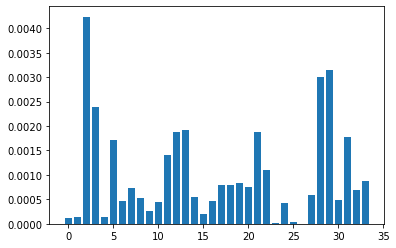

Attribute pat_geslacht_code has RMSE feature importance difference 0.014841044686991692
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009554311721809107
Attribute subloc_0 has RMSE feature importance difference 0.00024270523880454
Attribute subloc_2 has RMSE feature importance difference 0.00150151579120747
Attribute subloc_3 has RMSE feature importance difference 0.00044584873483382627
Attribute subloc_4 has RMSE feature importance difference 9.133185517985516e-05
Attribute subloc_5 has RMSE feature importance difference 0.0001289559792344934
Attribute subloc_6 has RMSE feature importance difference 3.606621090450797e-05
Attribute subloc_7 has RMSE feature importance difference 0.012860767765138352
Attribute subloc_8 has RMSE feature importance difference 5.845426277413076e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004025306156024565
Attribute stage_1 has RMSE feature importance difference 0.6347225250376585
Attribute stage_2 has

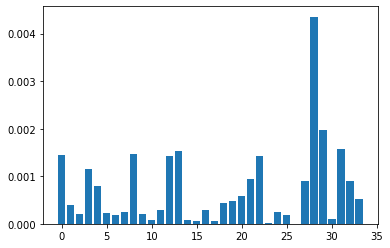

Attribute pat_geslacht_code has RMSE feature importance difference 0.014522225516573731
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009506050731503254
Attribute subloc_0 has RMSE feature importance difference 0.0003844993155055218
Attribute subloc_2 has RMSE feature importance difference 0.0015995073618264351
Attribute subloc_3 has RMSE feature importance difference 0.00041926413833997205
Attribute subloc_4 has RMSE feature importance difference 0.00012172254662372332
Attribute subloc_5 has RMSE feature importance difference 0.0001352077461282524
Attribute subloc_6 has RMSE feature importance difference 4.218302207274286e-05
Attribute subloc_7 has RMSE feature importance difference 0.012648601051715785
Attribute subloc_8 has RMSE feature importance difference 5.941387380155924e-05
Attribute subloc_9 has RMSE feature importance difference 0.000417330697725116
Attribute stage_1 has RMSE feature importance difference 0.6365040389178789
Attribute stage_2

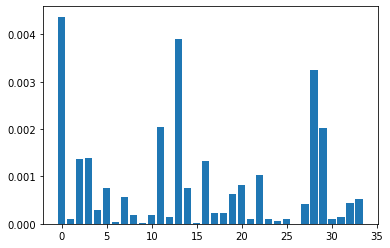

Attribute pat_geslacht_code has RMSE feature importance difference 0.013823352679176741
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009564132049720217
Attribute subloc_0 has RMSE feature importance difference 0.00034047501621654235
Attribute subloc_2 has RMSE feature importance difference 0.0015802852783412355
Attribute subloc_3 has RMSE feature importance difference 0.00044012062737412705
Attribute subloc_4 has RMSE feature importance difference 0.00011053653584362879
Attribute subloc_5 has RMSE feature importance difference 0.00013870798039179266
Attribute subloc_6 has RMSE feature importance difference 3.797532868992957e-05
Attribute subloc_7 has RMSE feature importance difference 0.012939216114058844
Attribute subloc_8 has RMSE feature importance difference 6.221185425474944e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004134615743786603
Attribute stage_1 has RMSE feature importance difference 0.6337244097114781
Attribute stag

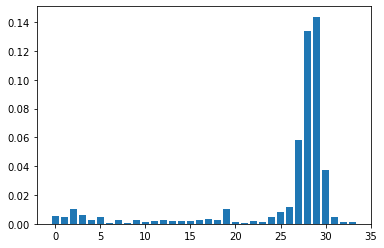

Attribute pat_geslacht_code has RMSE feature importance difference 0.013593134643923248
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008693972042567397
Attribute subloc_0 has RMSE feature importance difference 8.827971924559264e-05
Attribute subloc_2 has RMSE feature importance difference 0.0012505180370959846
Attribute subloc_3 has RMSE feature importance difference 0.0003352017901200818
Attribute subloc_4 has RMSE feature importance difference 4.6324225272587624e-05
Attribute subloc_5 has RMSE feature importance difference 0.0001281712704641396
Attribute subloc_6 has RMSE feature importance difference 1.4342982685832383e-05
Attribute subloc_7 has RMSE feature importance difference 0.012910628840032306
Attribute subloc_8 has RMSE feature importance difference 2.8619213747403734e-05
Attribute subloc_9 has RMSE feature importance difference 0.0003841629487535438
Attribute stage_1 has RMSE feature importance difference 0.6344069067226453
Attribute stage

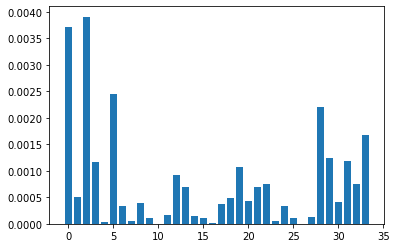

Attribute pat_geslacht_code has RMSE feature importance difference 0.013980789430044653
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009484706639117995
Attribute subloc_0 has RMSE feature importance difference 0.0002530479005028293
Attribute subloc_2 has RMSE feature importance difference 0.0015970891339440166
Attribute subloc_3 has RMSE feature importance difference 0.00045090591655605185
Attribute subloc_4 has RMSE feature importance difference 7.784123371998662e-05
Attribute subloc_5 has RMSE feature importance difference 0.00013180970414593049
Attribute subloc_6 has RMSE feature importance difference 4.4731498632264475e-05
Attribute subloc_7 has RMSE feature importance difference 0.012889762523818848
Attribute subloc_8 has RMSE feature importance difference 6.069021847590896e-05
Attribute subloc_9 has RMSE feature importance difference 0.00042061093678531715
Attribute stage_1 has RMSE feature importance difference 0.6367060440253453
Attribute stag

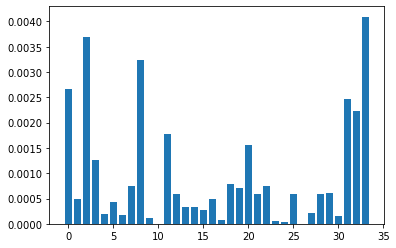

Attribute pat_geslacht_code has RMSE feature importance difference 0.01422705562278911
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009485873948293611
Attribute subloc_0 has RMSE feature importance difference 0.00025981553683520454
Attribute subloc_2 has RMSE feature importance difference 0.0015899266463412151
Attribute subloc_3 has RMSE feature importance difference 0.0004442547380763653
Attribute subloc_4 has RMSE feature importance difference 0.00011716117552234916
Attribute subloc_5 has RMSE feature importance difference 0.00013566186810139315
Attribute subloc_6 has RMSE feature importance difference 3.573417821472481e-05
Attribute subloc_7 has RMSE feature importance difference 0.012253387189549277
Attribute subloc_8 has RMSE feature importance difference 6.079064929755214e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004204879464647391
Attribute stage_1 has RMSE feature importance difference 0.6341250627403044
Attribute stage_

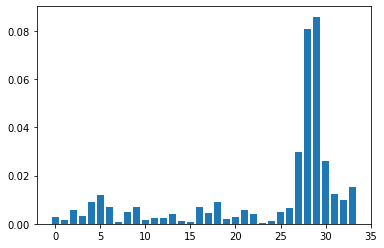

Attribute pat_geslacht_code has RMSE feature importance difference 0.014184452480023575
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009275923405289245
Attribute subloc_0 has RMSE feature importance difference 0.00019826626555603704
Attribute subloc_2 has RMSE feature importance difference 0.0014503674999834623
Attribute subloc_3 has RMSE feature importance difference 0.00014794595993606916
Attribute subloc_4 has RMSE feature importance difference 6.089265775134836e-07
Attribute subloc_5 has RMSE feature importance difference 2.2975204370372472e-05
Attribute subloc_6 has RMSE feature importance difference 3.8110074370730324e-05
Attribute subloc_7 has RMSE feature importance difference 0.011872704976145251
Attribute subloc_8 has RMSE feature importance difference 6.843074053164699e-07
Attribute subloc_9 has RMSE feature importance difference 0.00035493558498642076
Attribute stage_1 has RMSE feature importance difference 0.6328447799667501
Attribute sta

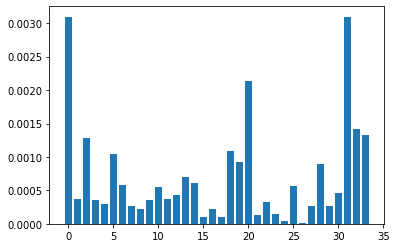

Attribute pat_geslacht_code has RMSE feature importance difference 0.014125523293946073
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009508752195203165
Attribute subloc_0 has RMSE feature importance difference 0.00034367246266901253
Attribute subloc_2 has RMSE feature importance difference 0.0016631059711862775
Attribute subloc_3 has RMSE feature importance difference 0.0004397156530826406
Attribute subloc_4 has RMSE feature importance difference 0.00010443543939123891
Attribute subloc_5 has RMSE feature importance difference 0.00012626500346377327
Attribute subloc_6 has RMSE feature importance difference 4.1848365838539404e-05
Attribute subloc_7 has RMSE feature importance difference 0.012930087436448447
Attribute subloc_8 has RMSE feature importance difference 5.7143021563840636e-05
Attribute subloc_9 has RMSE feature importance difference 0.0003984057549343516
Attribute stage_1 has RMSE feature importance difference 0.6363684929959399
Attribute sta

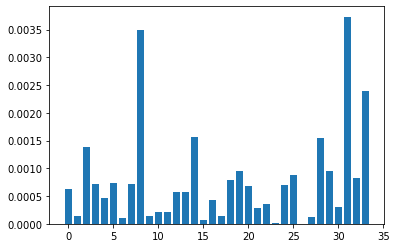

Attribute pat_geslacht_code has RMSE feature importance difference 0.014720671293737981
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009556674391972803
Attribute subloc_0 has RMSE feature importance difference 0.0003400817678092438
Attribute subloc_2 has RMSE feature importance difference 0.0016334933586135058
Attribute subloc_3 has RMSE feature importance difference 0.0004326398976524247
Attribute subloc_4 has RMSE feature importance difference 0.00011098625421655544
Attribute subloc_5 has RMSE feature importance difference 0.00013704794917157988
Attribute subloc_6 has RMSE feature importance difference 3.62687178408927e-05
Attribute subloc_7 has RMSE feature importance difference 0.012197644215499438
Attribute subloc_8 has RMSE feature importance difference 6.027436393396408e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004122610999747216
Attribute stage_1 has RMSE feature importance difference 0.6366293883284551
Attribute stage_2

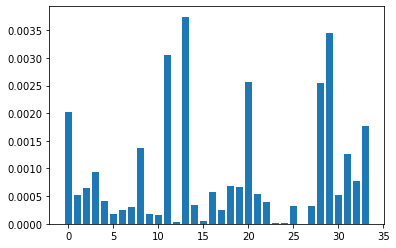

Attribute pat_geslacht_code has RMSE feature importance difference 0.014381536113957795
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009482406720539306
Attribute subloc_0 has RMSE feature importance difference 0.00036752892331777716
Attribute subloc_2 has RMSE feature importance difference 0.0016154587788073111
Attribute subloc_3 has RMSE feature importance difference 0.0004346131769849524
Attribute subloc_4 has RMSE feature importance difference 0.0001228036030014251
Attribute subloc_5 has RMSE feature importance difference 0.00013385124075619953
Attribute subloc_6 has RMSE feature importance difference 4.1430959721258656e-05
Attribute subloc_7 has RMSE feature importance difference 0.012670466664722097
Attribute subloc_8 has RMSE feature importance difference 5.966661634462598e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004144170667129139
Attribute stage_1 has RMSE feature importance difference 0.6321176611419178
Attribute stage

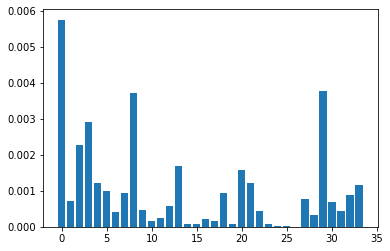

Attribute pat_geslacht_code has RMSE feature importance difference 0.013503013178446526
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00944181288274294
Attribute subloc_0 has RMSE feature importance difference 0.00030781878022944796
Attribute subloc_2 has RMSE feature importance difference 0.001462243347151261
Attribute subloc_3 has RMSE feature importance difference 0.0004023818182985314
Attribute subloc_4 has RMSE feature importance difference 0.00010536322041118755
Attribute subloc_5 has RMSE feature importance difference 0.00013024953016922816
Attribute subloc_6 has RMSE feature importance difference 3.3569346512330355e-05
Attribute subloc_7 has RMSE feature importance difference 0.012148463426859319
Attribute subloc_8 has RMSE feature importance difference 5.5448824482022905e-05
Attribute subloc_9 has RMSE feature importance difference 0.000414481490709399
Attribute stage_1 has RMSE feature importance difference 0.6366011178024171
Attribute stage_

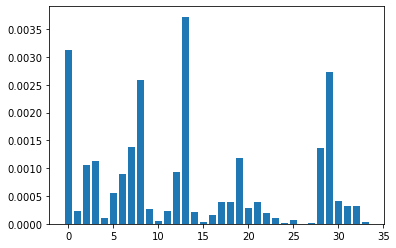

Attribute pat_geslacht_code has RMSE feature importance difference 0.014120619254044627
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00953785546540127
Attribute subloc_0 has RMSE feature importance difference 0.0003521700564487925
Attribute subloc_2 has RMSE feature importance difference 0.001601286256798156
Attribute subloc_3 has RMSE feature importance difference 0.0004480410182351725
Attribute subloc_4 has RMSE feature importance difference 0.00011481217039590283
Attribute subloc_5 has RMSE feature importance difference 0.00011915034603320607
Attribute subloc_6 has RMSE feature importance difference 2.8745286194254436e-05
Attribute subloc_7 has RMSE feature importance difference 0.012397056013033021
Attribute subloc_8 has RMSE feature importance difference 5.834442454494951e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004188270778324083
Attribute stage_1 has RMSE feature importance difference 0.6366065897178497
Attribute stage_2

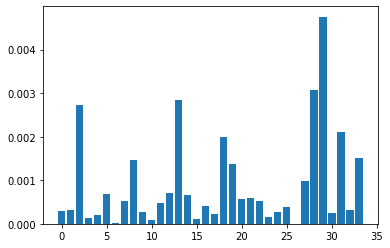

Attribute pat_geslacht_code has RMSE feature importance difference 0.014800487736271736
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009521282008394975
Attribute subloc_0 has RMSE feature importance difference 0.00029195722869532485
Attribute subloc_2 has RMSE feature importance difference 0.0016811765673518434
Attribute subloc_3 has RMSE feature importance difference 0.0004432099928115096
Attribute subloc_4 has RMSE feature importance difference 0.00011186960604239744
Attribute subloc_5 has RMSE feature importance difference 0.000139252206336027
Attribute subloc_6 has RMSE feature importance difference 3.8524310540153893e-05
Attribute subloc_7 has RMSE feature importance difference 0.012646802309541561
Attribute subloc_8 has RMSE feature importance difference 5.821447014187467e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004168368215051806
Attribute stage_1 has RMSE feature importance difference 0.6361927790435558
Attribute stage_

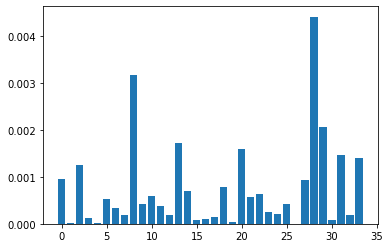

Attribute pat_geslacht_code has RMSE feature importance difference 0.01463824980612925
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009580372795530338
Attribute subloc_0 has RMSE feature importance difference 0.0003443267897859687
Attribute subloc_2 has RMSE feature importance difference 0.0016821895819153247
Attribute subloc_3 has RMSE feature importance difference 0.00045183774940519655
Attribute subloc_4 has RMSE feature importance difference 0.00011501478679973769
Attribute subloc_5 has RMSE feature importance difference 0.00013160044242064724
Attribute subloc_6 has RMSE feature importance difference 4.2972192216752756e-05
Attribute subloc_7 has RMSE feature importance difference 0.012266878364203423
Attribute subloc_8 has RMSE feature importance difference 5.613826697078223e-05
Attribute subloc_9 has RMSE feature importance difference 0.00039657974043051533
Attribute stage_1 has RMSE feature importance difference 0.6363678049759285
Attribute stag

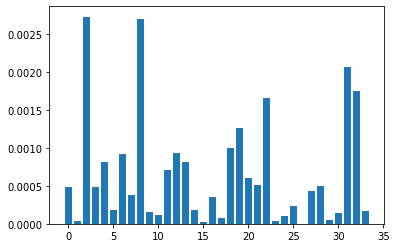

Attribute pat_geslacht_code has RMSE feature importance difference 0.014752118512537419
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009574407040992813
Attribute subloc_0 has RMSE feature importance difference 0.00029195731135956825
Attribute subloc_2 has RMSE feature importance difference 0.0016522974473027084
Attribute subloc_3 has RMSE feature importance difference 0.0004182107338190545
Attribute subloc_4 has RMSE feature importance difference 0.00012285418315957332
Attribute subloc_5 has RMSE feature importance difference 0.00011865666367612135
Attribute subloc_6 has RMSE feature importance difference 4.02893311815723e-05
Attribute subloc_7 has RMSE feature importance difference 0.012370857656500082
Attribute subloc_8 has RMSE feature importance difference 6.020863425931573e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004157245939262285
Attribute stage_1 has RMSE feature importance difference 0.6358343975585984
Attribute stage_

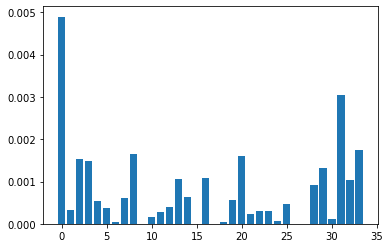

Attribute pat_geslacht_code has RMSE feature importance difference 0.013700988552629616
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009520448813601316
Attribute subloc_0 has RMSE feature importance difference 0.00033408815223981837
Attribute subloc_2 has RMSE feature importance difference 0.0015719918147704419
Attribute subloc_3 has RMSE feature importance difference 0.0004298960920382018
Attribute subloc_4 has RMSE feature importance difference 0.00011833899970889015
Attribute subloc_5 has RMSE feature importance difference 0.00013861686226427478
Attribute subloc_6 has RMSE feature importance difference 3.7601756565082394e-05
Attribute subloc_7 has RMSE feature importance difference 0.012604473164813843
Attribute subloc_8 has RMSE feature importance difference 6.254989777130004e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004141515636511648
Attribute stage_1 has RMSE feature importance difference 0.6365431831025744
Attribute stag

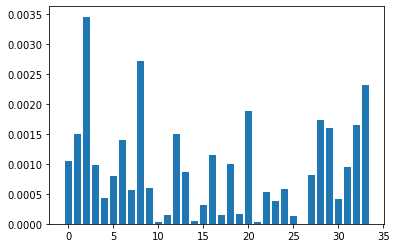

Attribute pat_geslacht_code has RMSE feature importance difference 0.014617962826783078
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009291077407493119
Attribute subloc_0 has RMSE feature importance difference 0.0002678575649745271
Attribute subloc_2 has RMSE feature importance difference 0.001613128092806681
Attribute subloc_3 has RMSE feature importance difference 0.000434034567858447
Attribute subloc_4 has RMSE feature importance difference 0.00010939827487451144
Attribute subloc_5 has RMSE feature importance difference 0.00010865828090091431
Attribute subloc_6 has RMSE feature importance difference 3.8064914750022745e-05
Attribute subloc_7 has RMSE feature importance difference 0.012368979260706047
Attribute subloc_8 has RMSE feature importance difference 5.342606359691861e-05
Attribute subloc_9 has RMSE feature importance difference 0.00041981577949216556
Attribute stage_1 has RMSE feature importance difference 0.6367418196872406
Attribute stage_

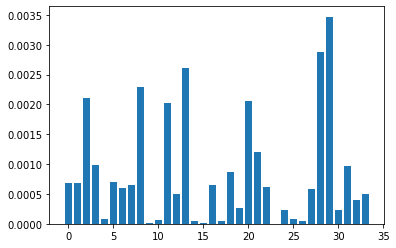

Attribute pat_geslacht_code has RMSE feature importance difference 0.014703109128322596
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009450543423528085
Attribute subloc_0 has RMSE feature importance difference 0.00031384856106228017
Attribute subloc_2 has RMSE feature importance difference 0.0016123694139337248
Attribute subloc_3 has RMSE feature importance difference 0.00044846801823153617
Attribute subloc_4 has RMSE feature importance difference 0.00011147923725628068
Attribute subloc_5 has RMSE feature importance difference 0.00012567210431202743
Attribute subloc_6 has RMSE feature importance difference 3.696964657577969e-05
Attribute subloc_7 has RMSE feature importance difference 0.01246442496911219
Attribute subloc_8 has RMSE feature importance difference 6.238541352665355e-05
Attribute subloc_9 has RMSE feature importance difference 0.000417999011450566
Attribute stage_1 has RMSE feature importance difference 0.6337456934806972
Attribute stage_

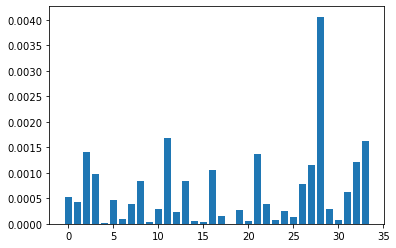

Attribute pat_geslacht_code has RMSE feature importance difference 0.01474234670297804
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00949976755796587
Attribute subloc_0 has RMSE feature importance difference 0.00033871895954559565
Attribute subloc_2 has RMSE feature importance difference 0.0016125572455871209
Attribute subloc_3 has RMSE feature importance difference 0.00045149680190279283
Attribute subloc_4 has RMSE feature importance difference 0.000116378694451788
Attribute subloc_5 has RMSE feature importance difference 0.00013718160267650102
Attribute subloc_6 has RMSE feature importance difference 4.0273463089870906e-05
Attribute subloc_7 has RMSE feature importance difference 0.012786972828751016
Attribute subloc_8 has RMSE feature importance difference 6.20853012600555e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004090646344598178
Attribute stage_1 has RMSE feature importance difference 0.6342841866238602
Attribute stage_2 

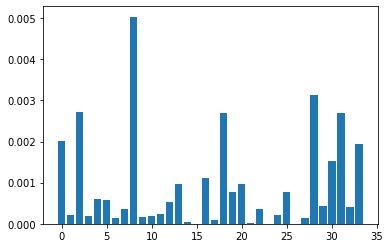

Attribute pat_geslacht_code has RMSE feature importance difference 0.0143859722754526
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009542930397969595
Attribute subloc_0 has RMSE feature importance difference 0.00029216910375963776
Attribute subloc_2 has RMSE feature importance difference 0.0016757349017590402
Attribute subloc_3 has RMSE feature importance difference 0.00042703242364893417
Attribute subloc_4 has RMSE feature importance difference 0.00011428939703654996
Attribute subloc_5 has RMSE feature importance difference 0.0001365294119530876
Attribute subloc_6 has RMSE feature importance difference 4.0625257859359135e-05
Attribute subloc_7 has RMSE feature importance difference 0.011858149421972115
Attribute subloc_8 has RMSE feature importance difference 5.980547648657798e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004130486852100836
Attribute stage_1 has RMSE feature importance difference 0.6365781657751465
Attribute stage_

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

Only one class left in synthetic dataset, no Logistic Regression possible. Coefficients are set to 0
Attribute pat_geslacht_code has RMSE feature importance difference 0.014871144606331516
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009582438627122797
Attribute subloc_0 has RMSE feature importance difference 0.00039269535442692247
Attribute subloc_2 has RMSE feature importance difference 0.0016922138877101976
Attribute subloc_3 has RMSE feature importance difference 0.0004521426321199391
Attribute subloc_4 has RMSE feature importance difference 0.00012686739242912304
Attribute subloc_5 has RMSE feature importance difference 0.00013957544307187549
Attribute subloc_6 has RMSE feature importance difference 4.5339572106161105e-05
Attribute subloc_7 has RMSE feature importance difference 0.012979684481457678
Attribute subloc_8 has RMSE feature importance difference 6.254989777130004e-05
Attribute subloc_9 has RMSE feature importance difference 0.000420707

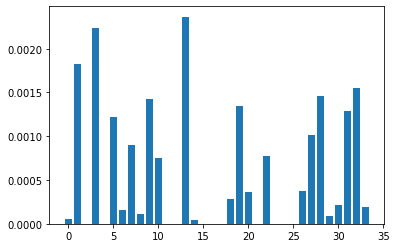

Attribute pat_geslacht_code has RMSE feature importance difference 0.01485720898870871
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009229165567461024
Attribute subloc_0 has RMSE feature importance difference 0.00039269535442692247
Attribute subloc_2 has RMSE feature importance difference 0.0015128487278570591
Attribute subloc_3 has RMSE feature importance difference 0.0004521426321199391
Attribute subloc_4 has RMSE feature importance difference 0.0001007659199268009
Attribute subloc_5 has RMSE feature importance difference 0.00013597534256226256
Attribute subloc_6 has RMSE feature importance difference 3.398041964498752e-05
Attribute subloc_7 has RMSE feature importance difference 0.012954010055561738
Attribute subloc_8 has RMSE feature importance difference 4.20560581492399e-05
Attribute subloc_9 has RMSE feature importance difference 0.00039025094290797113
Attribute stage_1 has RMSE feature importance difference 0.6369698307812631
Attribute stage_2

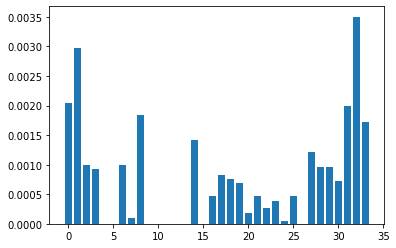

Attribute pat_geslacht_code has RMSE feature importance difference 0.014378210967268521
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009010306894310226
Attribute subloc_0 has RMSE feature importance difference 0.00035441825271765193
Attribute subloc_2 has RMSE feature importance difference 0.0016165050954720203
Attribute subloc_3 has RMSE feature importance difference 0.0004521426321199391
Attribute subloc_4 has RMSE feature importance difference 0.00012686739242912304
Attribute subloc_5 has RMSE feature importance difference 0.00011706321669734701
Attribute subloc_6 has RMSE feature importance difference 4.405059425089359e-05
Attribute subloc_7 has RMSE feature importance difference 0.01256436666972644
Attribute subloc_8 has RMSE feature importance difference 6.254989777130004e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004207078524811155
Attribute stage_1 has RMSE feature importance difference 0.6369698307812631
Attribute stage_

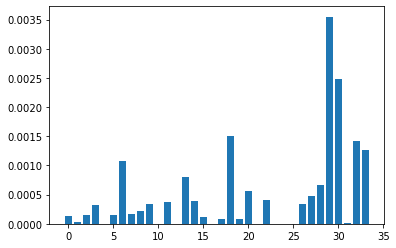

Attribute pat_geslacht_code has RMSE feature importance difference 0.014839097439317045
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00957477464727242
Attribute subloc_0 has RMSE feature importance difference 0.00038689756187085885
Attribute subloc_2 has RMSE feature importance difference 0.0016651929530996687
Attribute subloc_3 has RMSE feature importance difference 0.0004521426321199391
Attribute subloc_4 has RMSE feature importance difference 0.0001234062089309126
Attribute subloc_5 has RMSE feature importance difference 0.000115350834063756
Attribute subloc_6 has RMSE feature importance difference 4.3012761547540206e-05
Attribute subloc_7 has RMSE feature importance difference 0.01292974294246318
Attribute subloc_8 has RMSE feature importance difference 5.7229881208377254e-05
Attribute subloc_9 has RMSE feature importance difference 0.0004207078524811155
Attribute stage_1 has RMSE feature importance difference 0.6363633540920179
Attribute stage_2 

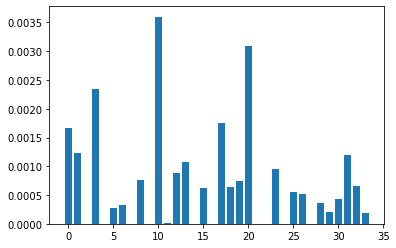

Attribute pat_geslacht_code has RMSE feature importance difference 0.014468799006348764
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009344391639127057
Attribute subloc_0 has RMSE feature importance difference 0.00039269535442692247
Attribute subloc_2 has RMSE feature importance difference 0.0015044522097472986
Attribute subloc_3 has RMSE feature importance difference 0.0004521426321199391
Attribute subloc_4 has RMSE feature importance difference 0.00012080620879935378
Attribute subloc_5 has RMSE feature importance difference 0.00013213733757158687
Attribute subloc_6 has RMSE feature importance difference 4.5339572106161105e-05
Attribute subloc_7 has RMSE feature importance difference 0.012807306028983289
Attribute subloc_8 has RMSE feature importance difference 6.254989777130004e-05
Attribute subloc_9 has RMSE feature importance difference 0.000286004597043969
Attribute stage_1 has RMSE feature importance difference 0.6369612435277683
Attribute stage

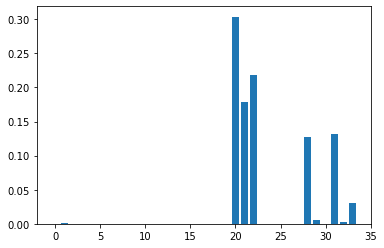

syn: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00000
Feature: tum_differentiatiegraad_code Score: 0.00000
Feature: subloc_0 Score: 0.00000
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00000
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 1.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.00000
Feature: stage_4A Score: 0.00000
Feature: stage_4B Score: 0.00000
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

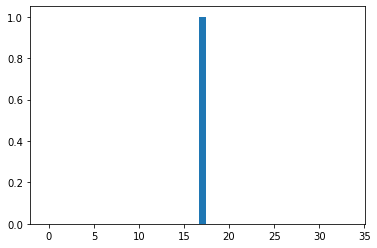

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

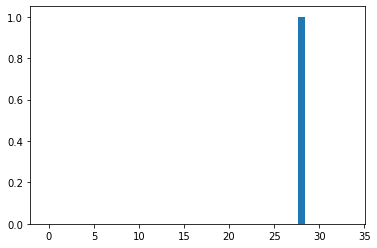

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

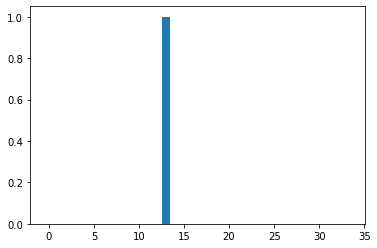

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 1.0
Attribute stage_2B has RMSE feature importance diff

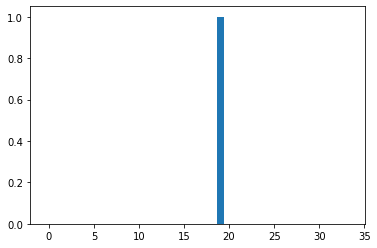

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

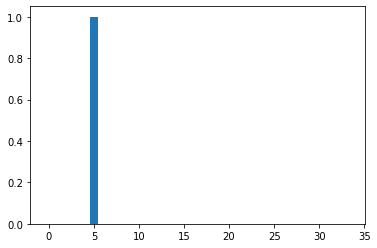

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 1.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

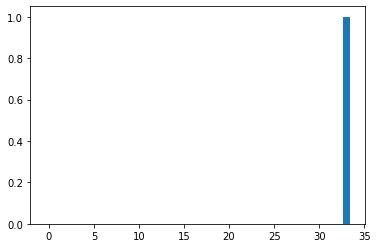

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

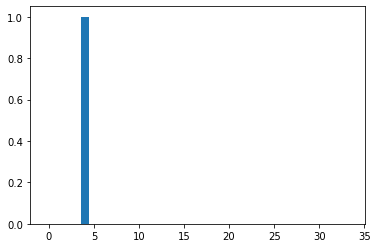

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 1.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

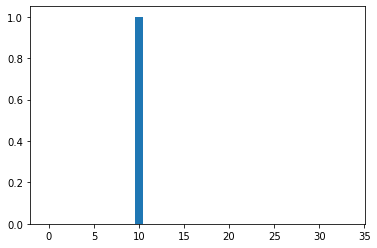

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 1.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

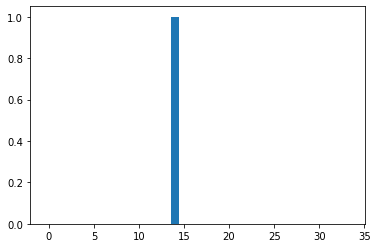

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

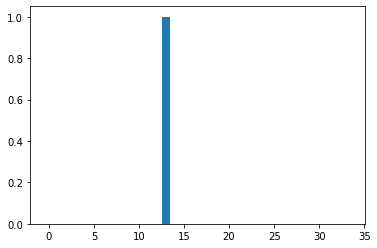

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 1.0
Attribute stage_2B has RMSE feature importance diff

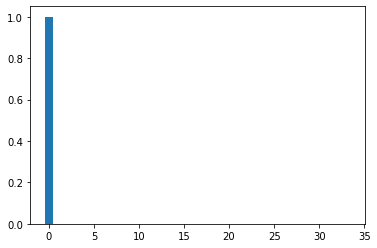

Attribute pat_geslacht_code has RMSE feature importance difference 0.9993802902395562
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance differe

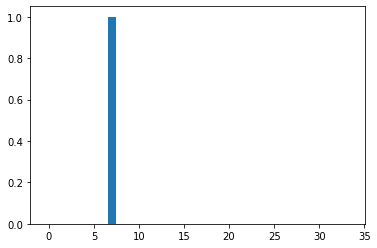

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 1.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

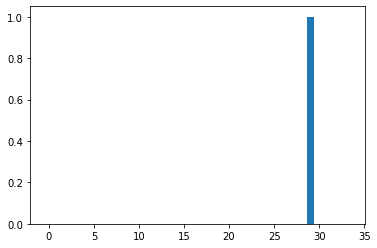

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

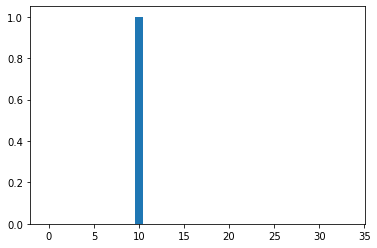

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 1.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

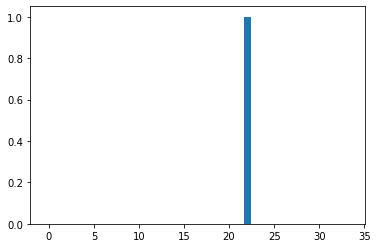

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

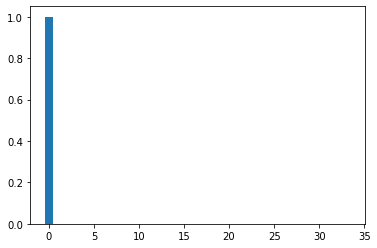

Attribute pat_geslacht_code has RMSE feature importance difference 0.9993802902395562
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance differe

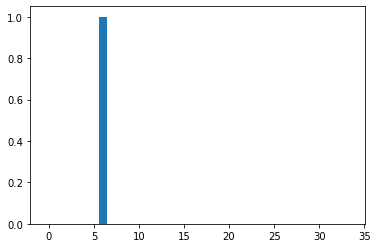

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 1.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

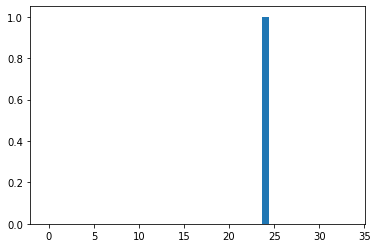

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

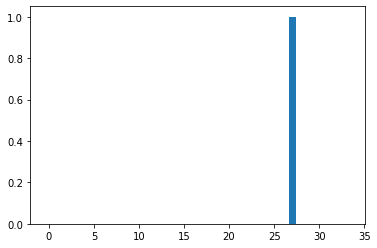

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

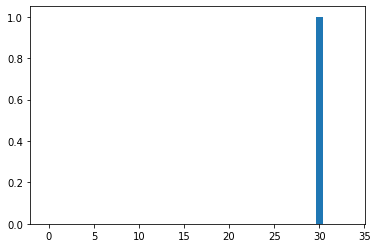

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

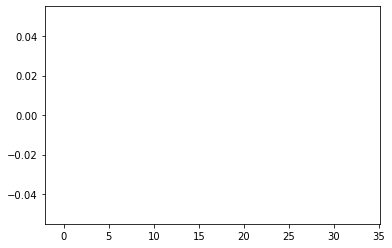

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

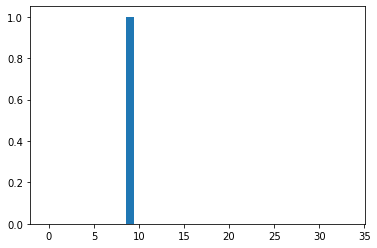

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 1.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

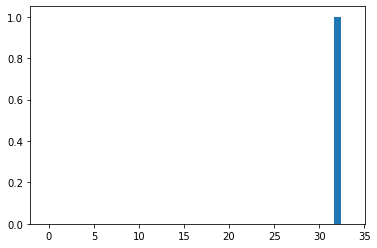

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

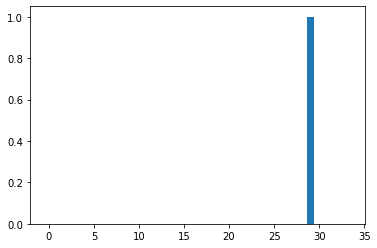

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

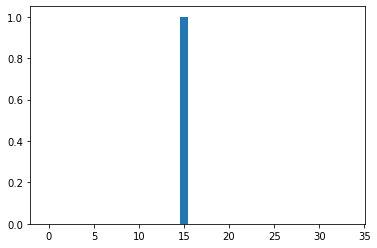

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

In [11]:
# Do for one DP algorithm at a time
privacy_levels = ms_privacy_levels

ms_FID_ORI, ms_FID, ms_FID_ERRORS = FIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
diagnosis_age_0-20 present in original data, thus added to validation data with value 0
ori: LogisticRegression(C=1, max_iter=4000)
accuracy of original model is 0.6175825007568877
Feature: pat_geslacht_code Score: 0.12195
Feature: tum_differentiatiegraad_code Score: 0.09789
Feature: subloc_0 Score: 0.01982
Feature: subloc_2 Score: 0.04114
Feature: subloc_3 Score: 0.02126
Feature: subloc_4 Score: 0.01126
Feature: subloc_5 Score: 0.01181
Feature: subloc_6 Score: 0.00673
Feature: subloc_7 Score: 0.11393
Feature: subloc_8 Score: 0.00791
Feature: subloc_9 Score: 0.02051
Feature: stage_1 Score: 0.79810
Feature: stage_2 Score: 0.47386
Feature: stage_2A Score: 0.73681
Feature: stage_2B Score: 0.17041
Feature: stage_2C Score: 0.06630
Feature: stage_3 Score: 0.20728
Feature: stage_3A Score: 0.19671
Feature: stage_3B Score: 0.34886
Feature: stage_3C Score: 0.04840
Feature: stage_

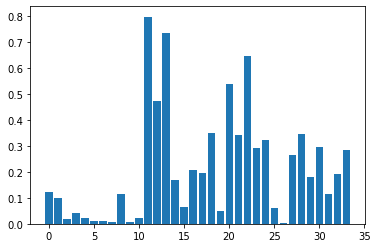

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=1, max_iter=4000)
Feature: pat_geslacht_code Score: 0.09854
Feature: tum_differentiatiegraad_code Score: 0.05605
Feature: subloc_0 Score: 0.03340
Feature: subloc_2 Score: 0.00957
Feature: subloc_3 Score: 0.03824
Feature: subloc_4 Score: 0.03038
Feature: subloc_5 Score: 0.01561
Feature: subloc_6 Score: 0.00929
Feature: subloc_7 Score: 0.04918
Feature: subloc_8 Score: 0.00948
Feature: subloc_9 Score: 0.00596
Feature: stage_1 Score: 0.54134
Feature: stage_2 Score: 0.27873
Feature: stage_2A Score: 0.47311
Feature: stage_2B Score: 0.07601
Feature: stage_2C Score: 0.03249
Feature: stage_3 Score: 0.10245
Feature: stage_3A Score: 0.13936
Feature: stage_3B Score: 0.22798
Feature: stage_3C Score: 0.02418
Feature: stage_4 Score: 0.60613
Feature: stage_4A Score: 0.37462
Feature: stage_4B Score: 0.51353
Feature: stage_4C Score: 0.03682
Feature: stage_M Score: 0.13790
Feature: stage_X Score: 0

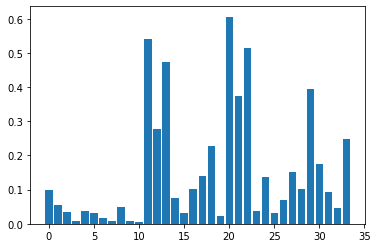

Attribute pat_geslacht_code has RMSE feature importance difference 0.0005477261320009987
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0017501834121320492
Attribute subloc_0 has RMSE feature importance difference 0.00018442898212550835
Attribute subloc_2 has RMSE feature importance difference 0.0009963682212945214
Attribute subloc_3 has RMSE feature importance difference 0.0002880305501937458
Attribute subloc_4 has RMSE feature importance difference 0.00036553845019044774
Attribute subloc_5 has RMSE feature importance difference 1.4420087294333142e-05
Attribute subloc_6 has RMSE feature importance difference 6.5113059283352465e-06
Attribute subloc_7 has RMSE feature importance difference 0.004192019956881451
Attribute subloc_8 has RMSE feature importance difference 2.466287305667892e-06
Attribute subloc_9 has RMSE feature importance difference 0.00021172363523998323
Attribute stage_1 has RMSE feature importance difference 0.0659291186974548
Attribute s

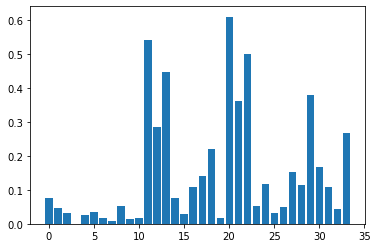

Attribute pat_geslacht_code has RMSE feature importance difference 0.0020166368477057693
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0025696018992237483
Attribute subloc_0 has RMSE feature importance difference 0.00012764750943739366
Attribute subloc_2 has RMSE feature importance difference 0.0016208150759911514
Attribute subloc_3 has RMSE feature importance difference 3.063167800035495e-05
Attribute subloc_4 has RMSE feature importance difference 0.0005073080503086065
Attribute subloc_5 has RMSE feature importance difference 2.7273074736297403e-05
Attribute subloc_6 has RMSE feature importance difference 1.487530136408937e-07
Attribute subloc_7 has RMSE feature importance difference 0.003924172501565836
Attribute subloc_8 has RMSE feature importance difference 5.591921517091636e-05
Attribute subloc_9 has RMSE feature importance difference 2.1689218336226877e-05
Attribute stage_1 has RMSE feature importance difference 0.0655430251617391
Attribute sta

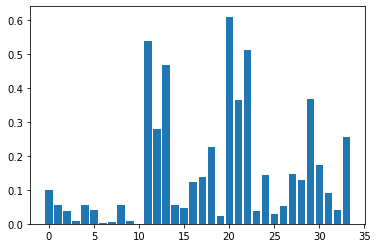

Attribute pat_geslacht_code has RMSE feature importance difference 0.0004958879927709308
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0017271202342613895
Attribute subloc_0 has RMSE feature importance difference 0.00037547361392462644
Attribute subloc_2 has RMSE feature importance difference 0.0010115780557854034
Attribute subloc_3 has RMSE feature importance difference 0.0012112797932249478
Attribute subloc_4 has RMSE feature importance difference 0.0008371401981074319
Attribute subloc_5 has RMSE feature importance difference 7.196884455668504e-05
Attribute subloc_6 has RMSE feature importance difference 1.6274216025046848e-07
Attribute subloc_7 has RMSE feature importance difference 0.0033481538329447774
Attribute subloc_8 has RMSE feature importance difference 1.0515164858075153e-06
Attribute subloc_9 has RMSE feature importance difference 0.0004082395359186533
Attribute stage_1 has RMSE feature importance difference 0.0671315334446107
Attribute st

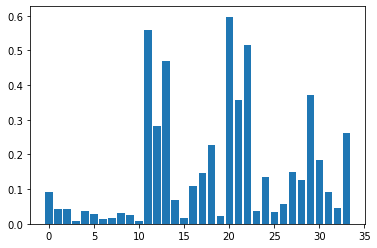

Attribute pat_geslacht_code has RMSE feature importance difference 0.0008488285206954644
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0030625255817329114
Attribute subloc_0 has RMSE feature importance difference 0.000587699961959696
Attribute subloc_2 has RMSE feature importance difference 0.0011188623198997891
Attribute subloc_3 has RMSE feature importance difference 0.0002225059683545909
Attribute subloc_4 has RMSE feature importance difference 0.00024565142890106765
Attribute subloc_5 has RMSE feature importance difference 1.9280745846733954e-06
Attribute subloc_6 has RMSE feature importance difference 8.103720410816334e-05
Attribute subloc_7 has RMSE feature importance difference 0.0068108512712313826
Attribute subloc_8 has RMSE feature importance difference 0.0002854832963690306
Attribute subloc_9 has RMSE feature importance difference 0.0001709707205411826
Attribute stage_1 has RMSE feature importance difference 0.05770293090742733
Attribute sta

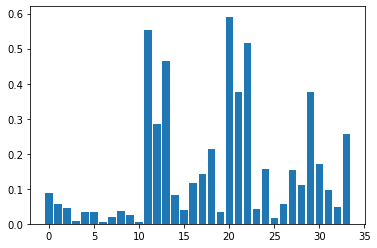

Attribute pat_geslacht_code has RMSE feature importance difference 0.0011050058633360232
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0017953300221874597
Attribute subloc_0 has RMSE feature importance difference 0.0006570820012798364
Attribute subloc_2 has RMSE feature importance difference 0.0010082720337711965
Attribute subloc_3 has RMSE feature importance difference 0.00013740237626790625
Attribute subloc_4 has RMSE feature importance difference 0.0004682367879383081
Attribute subloc_5 has RMSE feature importance difference 5.302027728073691e-05
Attribute subloc_6 has RMSE feature importance difference 0.00014614190045474603
Attribute subloc_7 has RMSE feature importance difference 0.006144360802022027
Attribute subloc_8 has RMSE feature importance difference 0.00027935353242833746
Attribute subloc_9 has RMSE feature importance difference 0.00021029338431724867
Attribute stage_1 has RMSE feature importance difference 0.06033933412835479
Attribute s

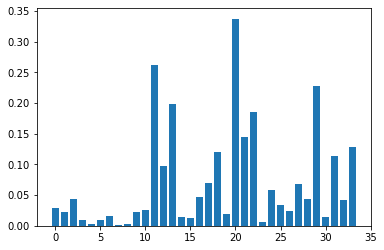

Attribute pat_geslacht_code has RMSE feature importance difference 0.008505337082343559
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.005776729675708005
Attribute subloc_0 has RMSE feature importance difference 0.0005650475238102092
Attribute subloc_2 has RMSE feature importance difference 0.0009589298319524567
Attribute subloc_3 has RMSE feature importance difference 0.0003184968840351404
Attribute subloc_4 has RMSE feature importance difference 6.029060498264013e-06
Attribute subloc_5 has RMSE feature importance difference 2.340983439661349e-05
Attribute subloc_6 has RMSE feature importance difference 2.13380453161966e-05
Attribute subloc_7 has RMSE feature importance difference 0.012160967195849954
Attribute subloc_8 has RMSE feature importance difference 0.0002358483329023044
Attribute subloc_9 has RMSE feature importance difference 2.1305618525782875e-05
Attribute stage_1 has RMSE feature importance difference 0.28787964671943606
Attribute stage_2

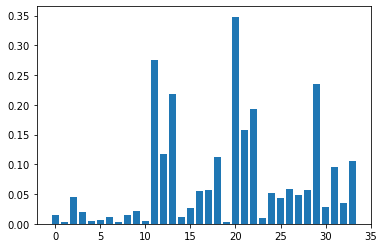

Attribute pat_geslacht_code has RMSE feature importance difference 0.011448141750431452
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008943489230648189
Attribute subloc_0 has RMSE feature importance difference 0.0005945457481090235
Attribute subloc_2 has RMSE feature importance difference 0.0004839615356613744
Attribute subloc_3 has RMSE feature importance difference 0.00025414993973337863
Attribute subloc_4 has RMSE feature importance difference 2.8486383332801606e-05
Attribute subloc_5 has RMSE feature importance difference 4.12589956535562e-07
Attribute subloc_6 has RMSE feature importance difference 1.1382540101856311e-05
Attribute subloc_7 has RMSE feature importance difference 0.009738390051168869
Attribute subloc_8 has RMSE feature importance difference 0.00017186709374396715
Attribute subloc_9 has RMSE feature importance difference 0.0002260518547423656
Attribute stage_1 has RMSE feature importance difference 0.27355149067086854
Attribute stag

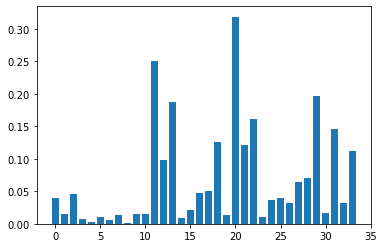

Attribute pat_geslacht_code has RMSE feature importance difference 0.006706353400652449
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.006855707214453985
Attribute subloc_0 has RMSE feature importance difference 0.0007039994666228579
Attribute subloc_2 has RMSE feature importance difference 0.0011827903431315468
Attribute subloc_3 has RMSE feature importance difference 0.0003342569959034898
Attribute subloc_4 has RMSE feature importance difference 9.202318914975192e-07
Attribute subloc_5 has RMSE feature importance difference 3.194775783889414e-05
Attribute subloc_6 has RMSE feature importance difference 3.876052637257546e-05
Attribute subloc_7 has RMSE feature importance difference 0.012828575382102053
Attribute subloc_8 has RMSE feature importance difference 4.216970886147487e-05
Attribute subloc_9 has RMSE feature importance difference 3.390252652003015e-05
Attribute stage_1 has RMSE feature importance difference 0.300597322390538
Attribute stage_2 h

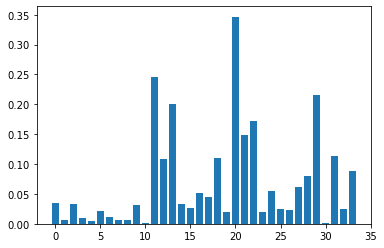

Attribute pat_geslacht_code has RMSE feature importance difference 0.0076053415440504625
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008226790149229782
Attribute subloc_0 has RMSE feature importance difference 0.00018511307273852103
Attribute subloc_2 has RMSE feature importance difference 0.0010094611179692168
Attribute subloc_3 has RMSE feature importance difference 0.00026871658465720373
Attribute subloc_4 has RMSE feature importance difference 8.774941303943039e-05
Attribute subloc_5 has RMSE feature importance difference 1.849518941436764e-07
Attribute subloc_6 has RMSE feature importance difference 6.947282717181347e-07
Attribute subloc_7 has RMSE feature importance difference 0.011712911664291207
Attribute subloc_8 has RMSE feature importance difference 0.0005204662309449343
Attribute subloc_9 has RMSE feature importance difference 0.00034331439278438705
Attribute stage_1 has RMSE feature importance difference 0.3045243840565572
Attribute stag

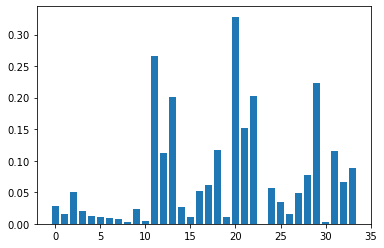

Attribute pat_geslacht_code has RMSE feature importance difference 0.00868352693135556
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.006705722976953576
Attribute subloc_0 has RMSE feature importance difference 0.0008939118072143643
Attribute subloc_2 has RMSE feature importance difference 0.0004511775496553144
Attribute subloc_3 has RMSE feature importance difference 7.729554895689564e-05
Attribute subloc_4 has RMSE feature importance difference 8.42194724065793e-07
Attribute subloc_5 has RMSE feature importance difference 9.813907266082204e-06
Attribute subloc_6 has RMSE feature importance difference 4.922113551004372e-07
Attribute subloc_7 has RMSE feature importance difference 0.012189628357679776
Attribute subloc_8 has RMSE feature importance difference 0.0002482650181009059
Attribute subloc_9 has RMSE feature importance difference 0.0002804855825306361
Attribute stage_1 has RMSE feature importance difference 0.28401184021112086
Attribute stage_2 h

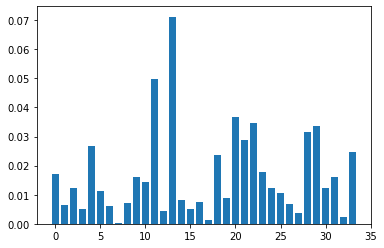

Attribute pat_geslacht_code has RMSE feature importance difference 0.01095453545046518
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00838896074696133
Attribute subloc_0 has RMSE feature importance difference 5.8225000562619727e-05
Attribute subloc_2 has RMSE feature importance difference 0.0013070760693052956
Attribute subloc_3 has RMSE feature importance difference 3.185136907840464e-05
Attribute subloc_4 has RMSE feature importance difference 1.8827334509218888e-08
Attribute subloc_5 has RMSE feature importance difference 3.1763213232128014e-05
Attribute subloc_6 has RMSE feature importance difference 4.037158648271619e-05
Attribute subloc_7 has RMSE feature importance difference 0.011369907327409761
Attribute subloc_8 has RMSE feature importance difference 6.631050587986183e-05
Attribute subloc_9 has RMSE feature importance difference 3.89405458519583e-05
Attribute stage_1 has RMSE feature importance difference 0.5599490982352687
Attribute stage_2 

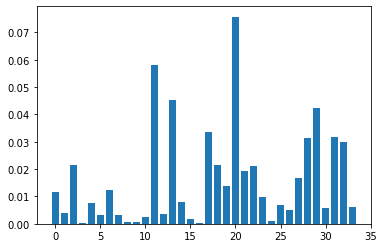

Attribute pat_geslacht_code has RMSE feature importance difference 0.012185748410032985
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00885686081378202
Attribute subloc_0 has RMSE feature importance difference 2.465957424864265e-06
Attribute subloc_2 has RMSE feature importance difference 0.001668772153290259
Attribute subloc_3 has RMSE feature importance difference 0.00018920138309678133
Attribute subloc_4 has RMSE feature importance difference 6.708870159198625e-05
Attribute subloc_5 has RMSE feature importance difference 1.4170122099947358e-07
Attribute subloc_6 has RMSE feature importance difference 1.230959823177354e-05
Attribute subloc_7 has RMSE feature importance difference 0.012795442550681881
Attribute subloc_8 has RMSE feature importance difference 5.5078029000458485e-05
Attribute subloc_9 has RMSE feature importance difference 0.0003312082868977679
Attribute stage_1 has RMSE feature importance difference 0.5475670009588673
Attribute stage_2

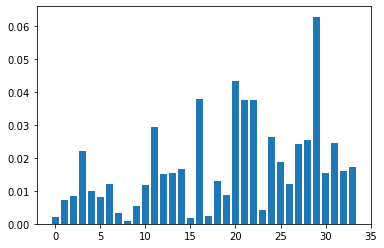

Attribute pat_geslacht_code has RMSE feature importance difference 0.014403570506397925
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008236974964473136
Attribute subloc_0 has RMSE feature importance difference 0.00013102615469839406
Attribute subloc_2 has RMSE feature importance difference 0.00036492958751227803
Attribute subloc_3 has RMSE feature importance difference 0.0001262472692012988
Attribute subloc_4 has RMSE feature importance difference 9.916416517721409e-06
Attribute subloc_5 has RMSE feature importance difference 2.1008229407203548e-08
Attribute subloc_6 has RMSE feature importance difference 1.2513757878687655e-05
Attribute subloc_7 has RMSE feature importance difference 0.01277695473969634
Attribute subloc_8 has RMSE feature importance difference 5.68204301531124e-06
Attribute subloc_9 has RMSE feature importance difference 7.64996127017383e-05
Attribute stage_1 has RMSE feature importance difference 0.5906913878491024
Attribute stage_2

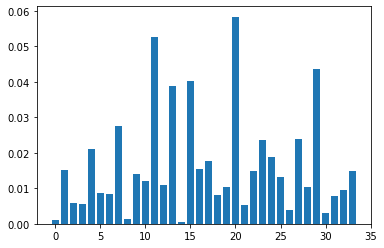

Attribute pat_geslacht_code has RMSE feature importance difference 0.014627032972181226
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.006839374451447055
Attribute subloc_0 has RMSE feature importance difference 0.0001910441750370662
Attribute subloc_2 has RMSE feature importance difference 0.0012566645105125404
Attribute subloc_3 has RMSE feature importance difference 1.0544835962803748e-08
Attribute subloc_4 has RMSE feature importance difference 6.113392160794072e-06
Attribute subloc_5 has RMSE feature importance difference 1.1207376612174441e-05
Attribute subloc_6 has RMSE feature importance difference 0.0004286759514865121
Attribute subloc_7 has RMSE feature importance difference 0.01265443109918542
Attribute subloc_8 has RMSE feature importance difference 3.894665446136454e-05
Attribute subloc_9 has RMSE feature importance difference 7.096047825225244e-05
Attribute stage_1 has RMSE feature importance difference 0.5558175763631096
Attribute stage_2

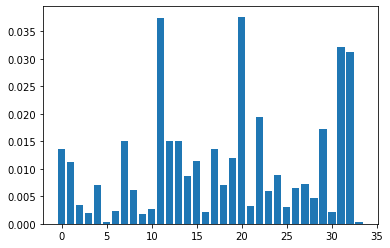

Attribute pat_geslacht_code has RMSE feature importance difference 0.011741785401214217
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0075032550690601624
Attribute subloc_0 has RMSE feature importance difference 0.0002710498975278438
Attribute subloc_2 has RMSE feature importance difference 0.0015364860996226598
Attribute subloc_3 has RMSE feature importance difference 0.00020353149008957408
Attribute subloc_4 has RMSE feature importance difference 0.00011889432815438061
Attribute subloc_5 has RMSE feature importance difference 8.991321320644759e-05
Attribute subloc_6 has RMSE feature importance difference 6.943729042463143e-05
Attribute subloc_7 has RMSE feature importance difference 0.011619904263152792
Attribute subloc_8 has RMSE feature importance difference 3.808920172651738e-05
Attribute subloc_9 has RMSE feature importance difference 0.0003154387470836178
Attribute stage_1 has RMSE feature importance difference 0.5786222074362424
Attribute stage

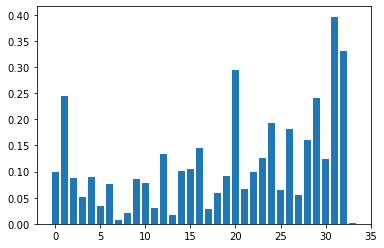

Attribute pat_geslacht_code has RMSE feature importance difference 0.0005222733291010478
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.02142287126598507
Attribute subloc_0 has RMSE feature importance difference 0.0045061347873841025
Attribute subloc_2 has RMSE feature importance difference 0.00012364301106990638
Attribute subloc_3 has RMSE feature importance difference 0.0045857883916008806
Attribute subloc_4 has RMSE feature importance difference 0.0005333831528961471
Attribute subloc_5 has RMSE feature importance difference 0.0042029505262951355
Attribute subloc_6 has RMSE feature importance difference 1.4186803747052893e-07
Attribute subloc_7 has RMSE feature importance difference 0.008717717122129492
Attribute subloc_8 has RMSE feature importance difference 0.006194287581295118
Attribute subloc_9 has RMSE feature importance difference 0.0032898026186068503
Attribute stage_1 has RMSE feature importance difference 0.5883308628105568
Attribute stage_2

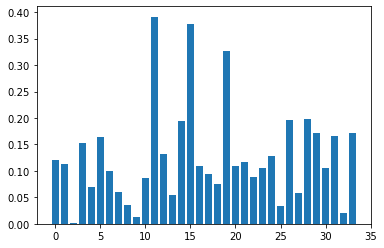

Attribute pat_geslacht_code has RMSE feature importance difference 4.361162209588587e-06
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0002232573400610471
Attribute subloc_0 has RMSE feature importance difference 0.0003037256796509787
Attribute subloc_2 has RMSE feature importance difference 0.01231565042814993
Attribute subloc_3 has RMSE feature importance difference 0.0023094229789510077
Attribute subloc_4 has RMSE feature importance difference 0.02353676298228386
Attribute subloc_5 has RMSE feature importance difference 0.007880098876397111
Attribute subloc_6 has RMSE feature importance difference 0.0028040289976770643
Attribute subloc_7 has RMSE feature importance difference 0.006270017953704676
Attribute subloc_8 has RMSE feature importance difference 2.467590802615934e-05
Attribute subloc_9 has RMSE feature importance difference 0.004244560065148261
Attribute stage_1 has RMSE feature importance difference 0.16543934833267895
Attribute stage_2 has

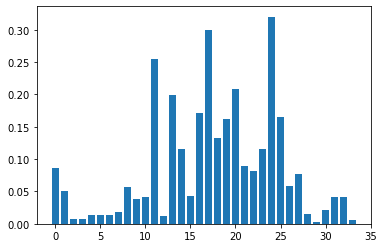

Attribute pat_geslacht_code has RMSE feature importance difference 0.001243029334298481
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0022356223870488873
Attribute subloc_0 has RMSE feature importance difference 0.00015407262519752225
Attribute subloc_2 has RMSE feature importance difference 0.0011549145538854635
Attribute subloc_3 has RMSE feature importance difference 6.616854182382618e-05
Attribute subloc_4 has RMSE feature importance difference 4.564314609092875e-06
Attribute subloc_5 has RMSE feature importance difference 3.0453732102786464e-06
Attribute subloc_6 has RMSE feature importance difference 0.00013632450410733162
Attribute subloc_7 has RMSE feature importance difference 0.0033401108023048912
Attribute subloc_8 has RMSE feature importance difference 0.0009175182951254934
Attribute subloc_9 has RMSE feature importance difference 0.0004276558601967048
Attribute stage_1 has RMSE feature importance difference 0.2948511538540542
Attribute sta

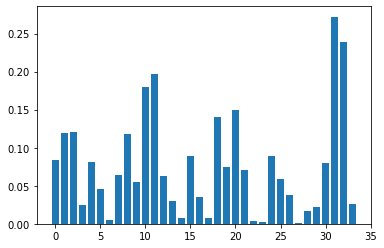

Attribute pat_geslacht_code has RMSE feature importance difference 0.0015008894566129391
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0004729592526653445
Attribute subloc_0 has RMSE feature importance difference 0.010251954963427136
Attribute subloc_2 has RMSE feature importance difference 0.0002891837514806189
Attribute subloc_3 has RMSE feature importance difference 0.0035949559177321853
Attribute subloc_4 has RMSE feature importance difference 0.0011936201913035603
Attribute subloc_5 has RMSE feature importance difference 4.177698235400739e-05
Attribute subloc_6 has RMSE feature importance difference 0.003304129902392614
Attribute subloc_7 has RMSE feature importance difference 1.882269420254152e-05
Attribute subloc_8 has RMSE feature importance difference 0.002200078644579872
Attribute subloc_9 has RMSE feature importance difference 0.025521163473706636
Attribute stage_1 has RMSE feature importance difference 0.36130037609963994
Attribute stage_2 

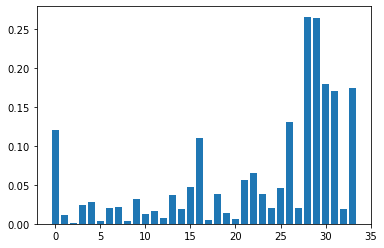

Attribute pat_geslacht_code has RMSE feature importance difference 5.068627856888326e-06
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007447360055133261
Attribute subloc_0 has RMSE feature importance difference 0.00033544110531751
Attribute subloc_2 has RMSE feature importance difference 0.00030349486008797796
Attribute subloc_3 has RMSE feature importance difference 4.554556216178779e-05
Attribute subloc_4 has RMSE feature importance difference 5.6260145259939446e-05
Attribute subloc_5 has RMSE feature importance difference 6.797124426829623e-05
Attribute subloc_6 has RMSE feature importance difference 0.00020706242456880477
Attribute subloc_7 has RMSE feature importance difference 0.012114261209284088
Attribute subloc_8 has RMSE feature importance difference 0.000578212685302724
Attribute subloc_9 has RMSE feature importance difference 6.037373197958661e-05
Attribute stage_1 has RMSE feature importance difference 0.6116082006773264
Attribute stage_2

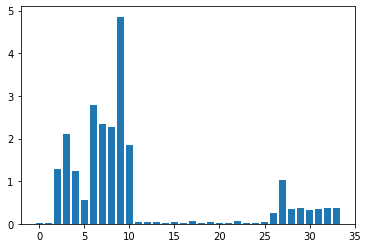

Attribute pat_geslacht_code has RMSE feature importance difference 0.009658327084343084
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007793204744865989
Attribute subloc_0 has RMSE feature importance difference 1.5846433505383988
Attribute subloc_2 has RMSE feature importance difference 4.241064037810838
Attribute subloc_3 has RMSE feature importance difference 1.4922550157328436
Attribute subloc_4 has RMSE feature importance difference 0.28818641136371526
Attribute subloc_5 has RMSE feature importance difference 7.695124850325728
Attribute subloc_6 has RMSE feature importance difference 5.420593868903204
Attribute subloc_7 has RMSE feature importance difference 4.7017206270991085
Attribute subloc_8 has RMSE feature importance difference 23.521270651227564
Attribute subloc_9 has RMSE feature importance difference 3.369383505314779
Attribute stage_1 has RMSE feature importance difference 0.5805129337954416
Attribute stage_2 has RMSE feature importance d

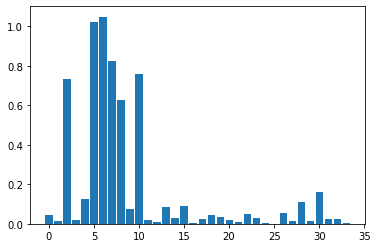

Attribute pat_geslacht_code has RMSE feature importance difference 0.005695141683114761
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.007323430591824053
Attribute subloc_0 has RMSE feature importance difference 0.5098711786922556
Attribute subloc_2 has RMSE feature importance difference 0.00040026959732214815
Attribute subloc_3 has RMSE feature importance difference 0.010908025199160907
Attribute subloc_4 has RMSE feature importance difference 1.0270436561092549
Attribute subloc_5 has RMSE feature importance difference 1.0765852226432122
Attribute subloc_6 has RMSE feature importance difference 0.6697159089741078
Attribute subloc_7 has RMSE feature importance difference 0.262934906646928
Attribute subloc_8 has RMSE feature importance difference 0.004632118669394933
Attribute subloc_9 has RMSE feature importance difference 0.5466186452423303
Attribute stage_1 has RMSE feature importance difference 0.6049356478279593
Attribute stage_2 has RMSE feature im

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

Only one class left in synthetic dataset, no Logistic Regression possible. Coefficients are set to 0
Attribute pat_geslacht_code has RMSE feature importance difference 0.014871144606331516
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009582438627122797
Attribute subloc_0 has RMSE feature importance difference 0.00039269535442692247
Attribute subloc_2 has RMSE feature importance difference 0.0016922138877101976
Attribute subloc_3 has RMSE feature importance difference 0.0004521426321199391
Attribute subloc_4 has RMSE feature importance difference 0.00012686739242912304
Attribute subloc_5 has RMSE feature importance difference 0.00013957544307187549
Attribute subloc_6 has RMSE feature importance difference 4.5339572106161105e-05
Attribute subloc_7 has RMSE feature importance difference 0.012979684481457678
Attribute subloc_8 has RMSE feature importance difference 6.254989777130004e-05
Attribute subloc_9 has RMSE feature importance difference 0.000420707

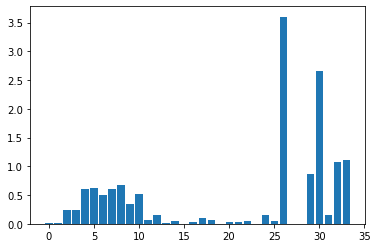

Attribute pat_geslacht_code has RMSE feature importance difference 0.01281374860361398
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.006952230401409187
Attribute subloc_0 has RMSE feature importance difference 0.04955958974469776
Attribute subloc_2 has RMSE feature importance difference 0.03780117125856915
Attribute subloc_3 has RMSE feature importance difference 0.3448190424554812
Attribute subloc_4 has RMSE feature importance difference 0.36784713215999537
Attribute subloc_5 has RMSE feature importance difference 0.2473598829954973
Attribute subloc_6 has RMSE feature importance difference 0.36223053009499145
Attribute subloc_7 has RMSE feature importance difference 0.31633567533043394
Attribute subloc_8 has RMSE feature importance difference 0.11068968915447491
Attribute subloc_9 has RMSE feature importance difference 0.24016256077747034
Attribute stage_1 has RMSE feature importance difference 0.5303271417976118
Attribute stage_2 has RMSE feature imp

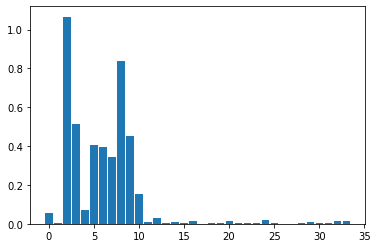

Attribute pat_geslacht_code has RMSE feature importance difference 0.0045306075928090595
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.008427018952782122
Attribute subloc_0 has RMSE feature importance difference 1.0942948660171516
Attribute subloc_2 has RMSE feature importance difference 0.22266660927612128
Attribute subloc_3 has RMSE feature importance difference 0.0026016527397660356
Attribute subloc_4 has RMSE feature importance difference 0.15642070421850254
Attribute subloc_5 has RMSE feature importance difference 0.14698299968644357
Attribute subloc_6 has RMSE feature importance difference 0.11433930707554983
Attribute subloc_7 has RMSE feature importance difference 0.5219076249286979
Attribute subloc_8 has RMSE feature importance difference 0.1991451174644569
Attribute subloc_9 has RMSE feature importance difference 0.017872704341712294
Attribute stage_1 has RMSE feature importance difference 0.6184014714539842
Attribute stage_2 has RMSE feature

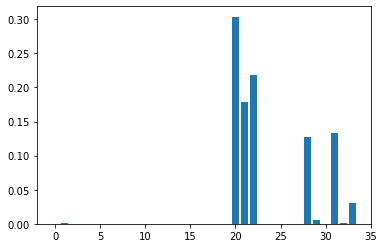

syn: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00012
Feature: tum_differentiatiegraad_code Score: 0.00056
Feature: subloc_0 Score: 0.00061
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00037
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 0.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.30918
Feature: stage_4A Score: 0.17806
Feature: stage_4B Score: 0.20202
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

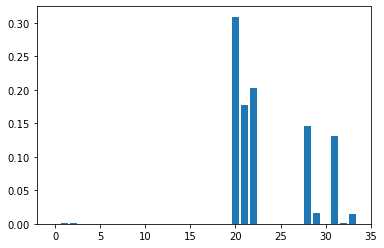

Attribute pat_geslacht_code has RMSE feature importance difference 3.490017512227932e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 1.1642735154552587e-07
Attribute subloc_0 has RMSE feature importance difference 3.7070881866586003e-07
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 4.502853925621616e-09
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE fea

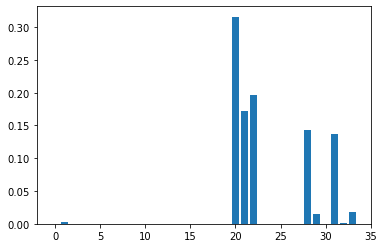

Attribute pat_geslacht_code has RMSE feature importance difference 7.410995903417119e-09
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 5.736999753815192e-06
Attribute subloc_0 has RMSE feature importance difference 5.360574577917008e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 5.103347519382336e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featu

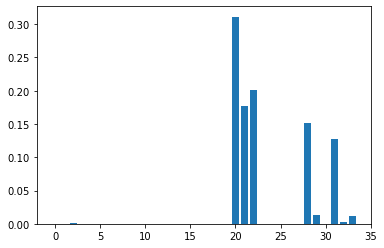

Attribute pat_geslacht_code has RMSE feature importance difference 9.601435532583484e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 1.2270684775603656e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 3.518103037216365e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

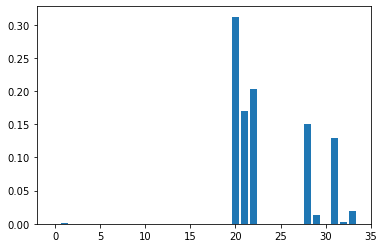

Attribute pat_geslacht_code has RMSE feature importance difference 5.2877131020181795e-09
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 5.063704413098861e-08
Attribute subloc_0 has RMSE feature importance difference 2.246116336279481e-08
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 6.955975717967992e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feat

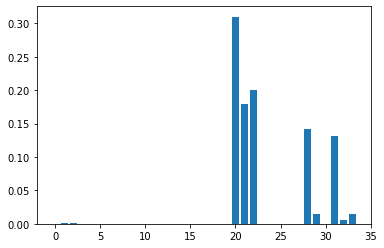

Attribute pat_geslacht_code has RMSE feature importance difference 9.046178448520374e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 9.699860978482718e-07
Attribute subloc_0 has RMSE feature importance difference 1.379913797425366e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featu

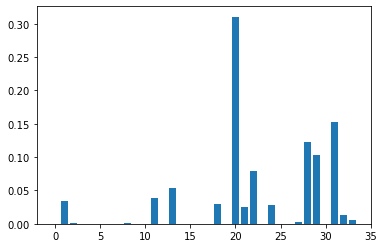

Attribute pat_geslacht_code has RMSE feature importance difference 6.390618476897006e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0010680257782957677
Attribute subloc_0 has RMSE feature importance difference 3.6243988696028054e-06
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 1.2181192301443034e-07
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0015383262121258336
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.002843687525633

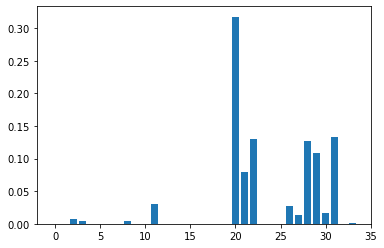

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 5.272373982751858e-05
Attribute subloc_2 has RMSE feature importance difference 1.5036646214962325e-05
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 1.860142603576195e-05
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0009228223006777518
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 

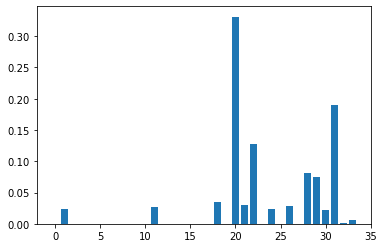

Attribute pat_geslacht_code has RMSE feature importance difference 5.501183870221671e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0005130739545111285
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0007364042221443058
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featu

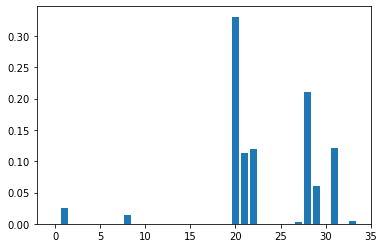

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0005991117156912944
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.0001943336898651874
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

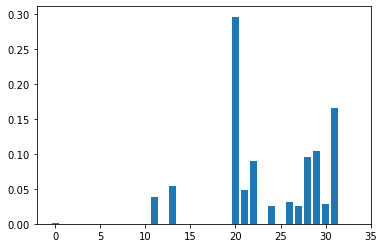

Attribute pat_geslacht_code has RMSE feature importance difference 2.6082751295282897e-07
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0014662055032077933
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.002899458977911466
Attribute stage

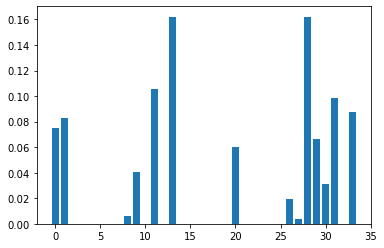

Attribute pat_geslacht_code has RMSE feature importance difference 0.005523872280401295
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.00669517633306722
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 3.229481022139385e-05
Attribute subloc_8 has RMSE feature importance difference 0.001630082975781566
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.01119915119148088
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.026220611387714112
Attr

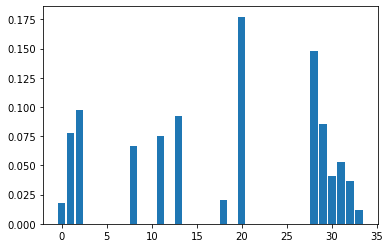

Attribute pat_geslacht_code has RMSE feature importance difference 0.0003117770002562737
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.005880202022852099
Attribute subloc_0 has RMSE feature importance difference 0.009464259342389512
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.004417808006462864
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.005684268355479635
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.008542060830584057
At

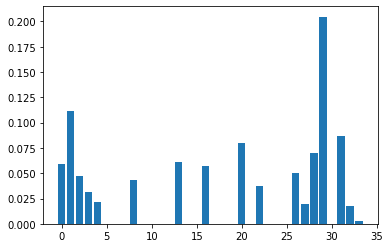

Attribute pat_geslacht_code has RMSE feature importance difference 0.0034714919411270783
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.0123345192389014
Attribute subloc_0 has RMSE feature importance difference 0.0021888081889814112
Attribute subloc_2 has RMSE feature importance difference 0.0009761253036026941
Attribute subloc_3 has RMSE feature importance difference 0.0004595779083386436
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.0018361102966596328
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.00

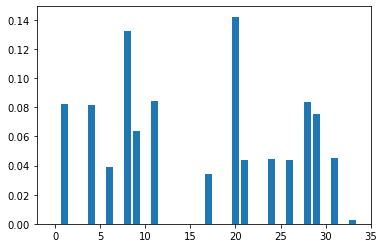

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.006639192720771932
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.006713477417562941
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0015272621041153929
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.01749796658077989
Attribute subloc_8 has RMSE feature importance difference 0.004077516479753713
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.007132618491889932
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance 

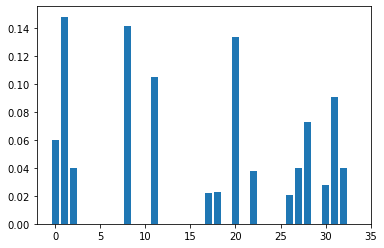

Attribute pat_geslacht_code has RMSE feature importance difference 0.0035722038266516177
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.02160979595335119
Attribute subloc_0 has RMSE feature importance difference 0.0016071823376540362
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.01983609745689547
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.010945399452302938
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B h

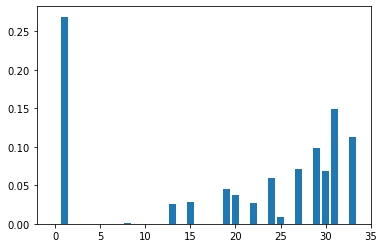

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.07172550229436217
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.342664042655774e-09
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0006298321486925162
Attribute stage_2B has RMSE feature

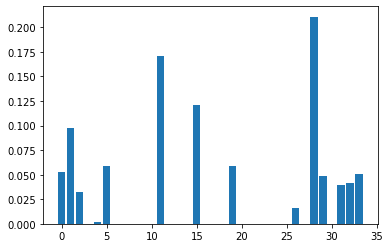

Attribute pat_geslacht_code has RMSE feature importance difference 0.0027893623308237283
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.009343764790388747
Attribute subloc_0 has RMSE feature importance difference 0.0010405540251639744
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 1.8254401172275995e-06
Attribute subloc_4 has RMSE feature importance difference 0.0034551475041147417
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.029069875224876803
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature import

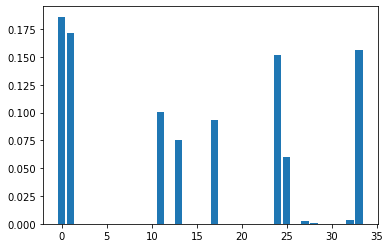

Attribute pat_geslacht_code has RMSE feature importance difference 0.03451894037535854
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.029002180835239408
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.010152682492556294
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.005656913370413733
Attribute stage_2B h

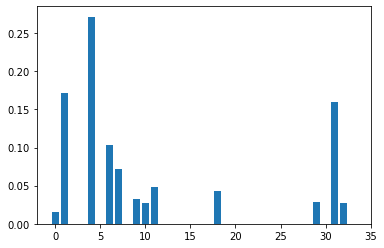

Attribute pat_geslacht_code has RMSE feature importance difference 0.00024062578603616458
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.02922077311077407
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.07367054810454078
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.010703880832722874
Attribute subloc_6 has RMSE feature importance difference 0.005213280261803978
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0010776805811360552
Attribute subloc_9 has RMSE feature importance difference 0.0007382968096621993
Attribute stage_1 has RMSE feature importance difference 0.0022987006079481075
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute 

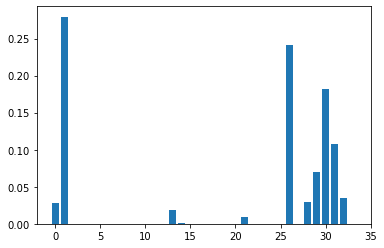

Attribute pat_geslacht_code has RMSE feature importance difference 0.0007345026913931176
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 0.07756183000310293
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 8.116400913561604e-08
Attribute subloc_8 has RMSE feature importance difference 6.869870468758549e-09
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.00033476138842535925
Attribute stage_

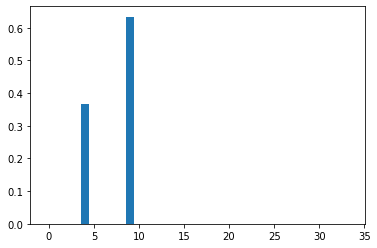

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.13429071159558595
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.4013767695926086
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B h

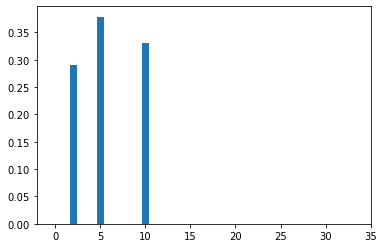

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.08404589167802161
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.14350130644139095
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.10974487631622018
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Att

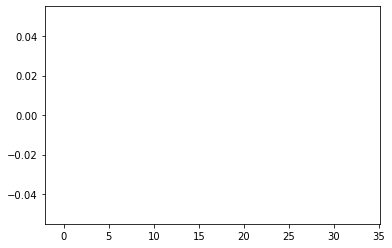

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE feature importance diff

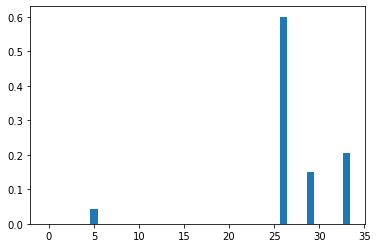

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.0
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.0018295879523396532
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 9.297330553612866e-08
Attribute subloc_8 has RMSE feature importance difference 0.0
Attribute subloc_9 has RMSE feature importance difference 0.0
Attribute stage_1 has RMSE feature importance difference 0.0
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE feature importance difference 0.0
Attribute stage_2B has RMSE featu

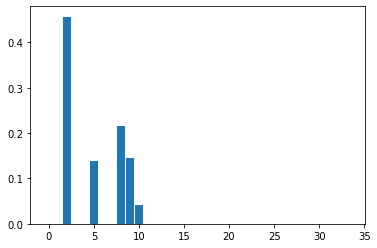

Attribute pat_geslacht_code has RMSE feature importance difference 9.603980750631776e-08
Attribute tum_differentiatiegraad_code has RMSE feature importance difference 8.067568757681584e-07
Attribute subloc_0 has RMSE feature importance difference 0.20839245874032353
Attribute subloc_2 has RMSE feature importance difference 0.0
Attribute subloc_3 has RMSE feature importance difference 0.0
Attribute subloc_4 has RMSE feature importance difference 0.019349043300224886
Attribute subloc_5 has RMSE feature importance difference 0.0
Attribute subloc_6 has RMSE feature importance difference 0.0
Attribute subloc_7 has RMSE feature importance difference 0.046661684437677396
Attribute subloc_8 has RMSE feature importance difference 0.02129197842122041
Attribute subloc_9 has RMSE feature importance difference 0.0017658879949300932
Attribute stage_1 has RMSE feature importance difference 4.4298706566767237e-10
Attribute stage_2 has RMSE feature importance difference 0.0
Attribute stage_2A has RMSE 

In [12]:
# Do for one DP algorithm at a time
privacy_levels = pb_privacy_levels

pb_FID_ORI, pb_FID, pb_FID_ERRORS = FIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
diagnosis_age_0-20 present in original data, thus added to validation data with value 0
ori: LogisticRegression(C=1, max_iter=4000)
accuracy of original model is 0.6175825007568877
Feature: pat_geslacht_code Score: 0.12195
Feature: tum_differentiatiegraad_code Score: 0.09789
Feature: subloc_0 Score: 0.01982
Feature: subloc_2 Score: 0.04114
Feature: subloc_3 Score: 0.02126
Feature: subloc_4 Score: 0.01126
Feature: subloc_5 Score: 0.01181
Feature: subloc_6 Score: 0.00673
Feature: subloc_7 Score: 0.11393
Feature: subloc_8 Score: 0.00791
Feature: subloc_9 Score: 0.02051
Feature: stage_1 Score: 0.79810
Feature: stage_2 Score: 0.47386
Feature: stage_2A Score: 0.73681
Feature: stage_2B Score: 0.17041
Feature: stage_2C Score: 0.06630
Feature: stage_3 Score: 0.20728
Feature: stage_3A Score: 0.19671
Feature: stage_3B Score: 0.34886
Feature: stage_3C Score: 0.04840
Feature: stage_

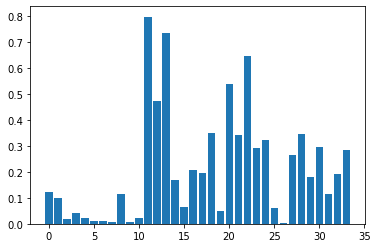

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=0.0001, max_iter=4000)
Feature: pat_geslacht_code Score: 0.00012
Feature: tum_differentiatiegraad_code Score: 0.00014
Feature: subloc_0 Score: 0.00424
Feature: subloc_2 Score: 0.00239
Feature: subloc_3 Score: 0.00015
Feature: subloc_4 Score: 0.00171
Feature: subloc_5 Score: 0.00046
Feature: subloc_6 Score: 0.00073
Feature: subloc_7 Score: 0.00052
Feature: subloc_8 Score: 0.00026
Feature: subloc_9 Score: 0.00045
Feature: stage_1 Score: 0.00141
Feature: stage_2 Score: 0.00189
Feature: stage_2A Score: 0.00192
Feature: stage_2B Score: 0.00055
Feature: stage_2C Score: 0.00021
Feature: stage_3 Score: 0.00046
Feature: stage_3A Score: 0.00080
Feature: stage_3B Score: 0.00079
Feature: stage_3C Score: 0.00083
Feature: stage_4 Score: 0.00075
Feature: stage_4A Score: 0.00188
Feature: stage_4B Score: 0.00109
Feature: stage_4C Score: 0.00002
Feature: stage_M Score: 0.00043
Feature: stage_X Sco

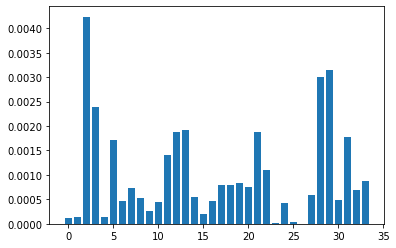

Attribute pat_geslacht_code has squared feature importance difference 0.00016700168931917887
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.264572902123878e-05
Attribute subloc_0 has squared feature importance difference 0.014168956146693671
Attribute subloc_2 has squared feature importance difference 0.003969879373362252
Attribute subloc_3 has squared feature importance difference 1.9429576023537913e-06
Attribute subloc_4 has squared feature importance difference 0.0022562828789347757
Attribute subloc_5 has squared feature importance difference 0.00013382792906927975
Attribute subloc_6 has squared feature importance difference 0.0003999471564172219
Attribute subloc_7 has squared feature importance difference 1.3121207642618172e-07
Attribute subloc_8 has squared feature importance difference 4.218022389490681e-05
Attribute subloc_9 has squared feature importance difference 0.00010195365333270513
Attribute stage_1 has squared feature importance differ

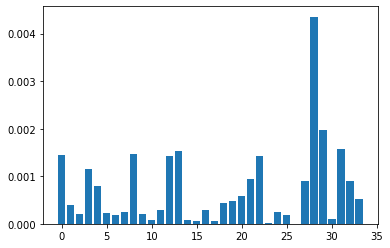

Attribute pat_geslacht_code has squared feature importance difference 0.001738957607486051
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.668763188696004e-06
Attribute subloc_0 has squared feature importance difference 3.279601972623007e-05
Attribute subloc_2 has squared feature importance difference 0.0016510371326807884
Attribute subloc_3 has squared feature importance difference 0.0008391543625051171
Attribute subloc_4 has squared feature importance difference 6.0932406136068703e-05
Attribute subloc_5 has squared feature importance difference 3.523192185336161e-05
Attribute subloc_6 has squared feature importance difference 7.631644494615722e-05
Attribute subloc_7 has squared feature importance difference 0.001911973790240588
Attribute subloc_8 has squared feature importance difference 4.9685990333564784e-05
Attribute subloc_9 has squared feature importance difference 3.183930118596693e-07
Attribute stage_1 has squared feature importance differenc

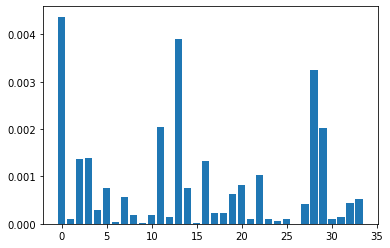

Attribute pat_geslacht_code has squared feature importance difference 0.02009632987701535
Attribute tum_differentiatiegraad_code has squared feature importance difference 9.675755475722744e-05
Attribute subloc_0 has squared feature importance difference 0.0021791687488816425
Attribute subloc_2 has squared feature importance difference 0.001979790122310003
Attribute subloc_3 has squared feature importance difference 5.5089925285485954e-05
Attribute subloc_4 has squared feature importance difference 0.0006555420836520798
Attribute subloc_5 has squared feature importance difference 7.051584161210011e-08
Attribute subloc_6 has squared feature importance difference 0.0003899086340092107
Attribute subloc_7 has squared feature importance difference 8.023293839052188e-05
Attribute subloc_8 has squared feature importance difference 8.646751540447217e-08
Attribute subloc_9 has squared feature importance difference 1.3300227410904382e-05
Attribute stage_1 has squared feature importance difference

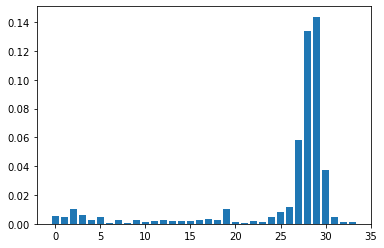

Attribute pat_geslacht_code has squared feature importance difference 2.805352575457204e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.2436711064160778e-05
Attribute subloc_0 has squared feature importance difference 0.0003630928127182599
Attribute subloc_2 has squared feature importance difference 4.205573242296728e-05
Attribute subloc_3 has squared feature importance difference 1.0829516605368466e-05
Attribute subloc_4 has squared feature importance difference 6.043607693518129e-05
Attribute subloc_5 has squared feature importance difference 3.2217284808257416e-07
Attribute subloc_6 has squared feature importance difference 2.7401675432339854e-05
Attribute subloc_7 has squared feature importance difference 0.00021766702177733772
Attribute subloc_8 has squared feature importance difference 1.8221630491978407e-05
Attribute subloc_9 has squared feature importance difference 7.571388845679514e-07
Attribute stage_1 has squared feature importance dif

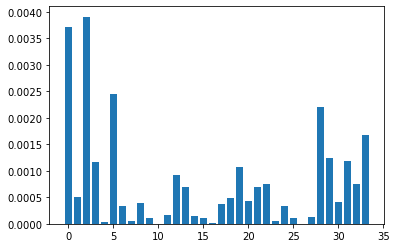

Attribute pat_geslacht_code has squared feature importance difference 0.015123490224314973
Attribute tum_differentiatiegraad_code has squared feature importance difference 3.14325300232236e-05
Attribute subloc_0 has squared feature importance difference 0.020844177749079665
Attribute subloc_2 has squared feature importance difference 0.0014874705953344571
Attribute subloc_3 has squared feature importance difference 3.1578007561829183e-06
Attribute subloc_4 has squared feature importance difference 0.0081533787150722
Attribute subloc_5 has squared feature importance difference 0.00011979259400728065
Attribute subloc_6 has squared feature importance difference 6.319129309112364e-07
Attribute subloc_7 has squared feature importance difference 2.651269733668522e-07
Attribute subloc_8 has squared feature importance difference 1.1478510370281238e-05
Attribute subloc_9 has squared feature importance difference 7.188935074302864e-06
Attribute stage_1 has squared feature importance difference 0

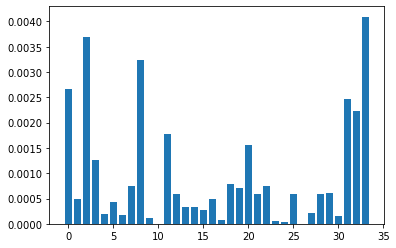

Attribute pat_geslacht_code has squared feature importance difference 0.004364255721837319
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.259968007524599e-06
Attribute subloc_0 has squared feature importance difference 0.012459171793551367
Attribute subloc_2 has squared feature importance difference 0.001120410373456299
Attribute subloc_3 has squared feature importance difference 8.332563115577301e-06
Attribute subloc_4 has squared feature importance difference 0.00014548925319978452
Attribute subloc_5 has squared feature importance difference 1.2676869918408567e-05
Attribute subloc_6 has squared feature importance difference 0.0005039112222808286
Attribute subloc_7 has squared feature importance difference 0.007149987552099926
Attribute subloc_8 has squared feature importance difference 5.732233710559254e-06
Attribute subloc_9 has squared feature importance difference 6.7827884769633854e-06
Attribute stage_1 has squared feature importance difference

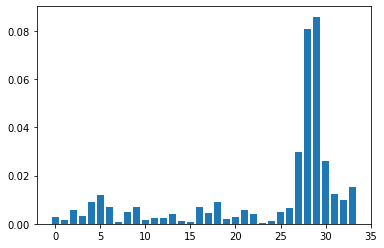

Attribute pat_geslacht_code has squared feature importance difference 7.863511717822771e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.115713660368456e-05
Attribute subloc_0 has squared feature importance difference 0.00015949594441173878
Attribute subloc_2 has squared feature importance difference 6.710923735396645e-06
Attribute subloc_3 has squared feature importance difference 0.0004584544633437048
Attribute subloc_4 has squared feature importance difference 0.0009373765781263968
Attribute subloc_5 has squared feature importance difference 0.00029374945130533414
Attribute subloc_6 has squared feature importance difference 3.425436558570137e-07
Attribute subloc_7 has squared feature importance difference 4.553494278641569e-06
Attribute subloc_8 has squared feature importance difference 0.00031785251463540794
Attribute subloc_9 has squared feature importance difference 2.855868623138398e-06
Attribute stage_1 has squared feature importance differ

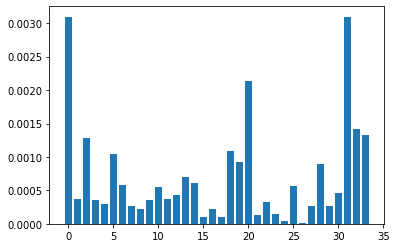

Attribute pat_geslacht_code has squared feature importance difference 0.0126020636986561
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.035637083114956e-06
Attribute subloc_0 has squared feature importance difference 0.0025461514605871548
Attribute subloc_2 has squared feature importance difference 8.494342832340711e-05
Attribute subloc_3 has squared feature importance difference 8.762772246407254e-05
Attribute subloc_4 has squared feature importance difference 0.0017546150323839726
Attribute subloc_5 has squared feature importance difference 0.0005022088659690018
Attribute subloc_6 has squared feature importance difference 0.00010168558700292408
Attribute subloc_7 has squared feature importance difference 4.005231040785886e-05
Attribute subloc_8 has squared feature importance difference 0.00018126851162275143
Attribute subloc_9 has squared feature importance difference 0.0004055787225551065
Attribute stage_1 has squared feature importance difference

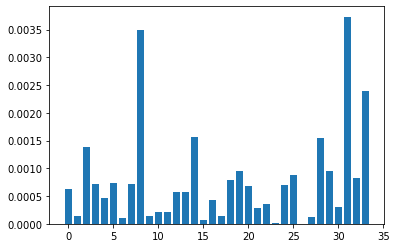

Attribute pat_geslacht_code has squared feature importance difference 4.346395852437301e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.906208445848309e-05
Attribute subloc_0 has squared feature importance difference 0.002361952202683007
Attribute subloc_2 has squared feature importance difference 0.00045330359299206675
Attribute subloc_3 has squared feature importance difference 0.0002078088512943274
Attribute subloc_4 has squared feature importance difference 0.0006575509666749713
Attribute subloc_5 has squared feature importance difference 5.813082717214194e-06
Attribute subloc_6 has squared feature importance difference 0.0006556065937800805
Attribute subloc_7 has squared feature importance difference 0.013126460720215965
Attribute subloc_8 has squared feature importance difference 1.888293801931255e-05
Attribute subloc_9 has squared feature importance difference 2.446410719750231e-05
Attribute stage_1 has squared feature importance difference

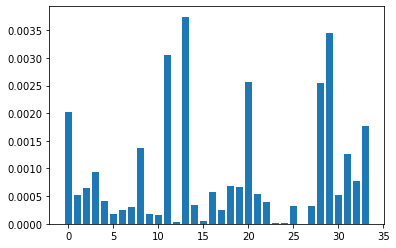

Attribute pat_geslacht_code has squared feature importance difference 0.0024236290448454824
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.1603172310586202e-05
Attribute subloc_0 has squared feature importance difference 0.0003339436776794775
Attribute subloc_2 has squared feature importance difference 0.0006287620322545663
Attribute subloc_3 has squared feature importance difference 0.00011318258980717738
Attribute subloc_4 has squared feature importance difference 1.9196925239221834e-05
Attribute subloc_5 has squared feature importance difference 4.0317132027150274e-05
Attribute subloc_6 has squared feature importance difference 7.608902043653916e-05
Attribute subloc_7 has squared feature importance difference 0.0008366222455873352
Attribute subloc_8 has squared feature importance difference 2.418530703338607e-05
Attribute subloc_9 has squared feature importance difference 4.954239720932791e-06
Attribute stage_1 has squared feature importance diffe

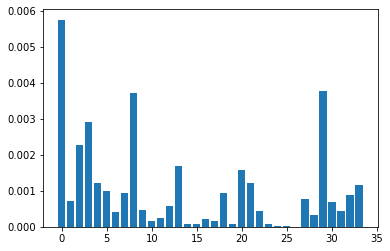

Attribute pat_geslacht_code has squared feature importance difference 0.021809769575303836
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.445711121549306e-05
Attribute subloc_0 has squared feature importance difference 0.0038733921418083175
Attribute subloc_2 has squared feature importance difference 0.005964299908890179
Attribute subloc_3 has squared feature importance difference 0.0009945375412201125
Attribute subloc_4 has squared feature importance difference 0.0007301092558649688
Attribute subloc_5 has squared feature importance difference 9.755794666946526e-05
Attribute subloc_6 has squared feature importance difference 0.000672741283598614
Attribute subloc_7 has squared feature importance difference 0.00820374656993181
Attribute subloc_8 has squared feature importance difference 0.00014752099787487772
Attribute subloc_9 has squared feature importance difference 2.5057798449068e-06
Attribute stage_1 has squared feature importance difference 0.01

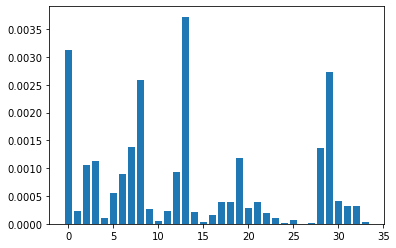

Attribute pat_geslacht_code has squared feature importance difference 0.011888223608106074
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.6329644568823167e-05
Attribute subloc_0 has squared feature importance difference 0.0015692341750431012
Attribute subloc_2 has squared feature importance difference 0.0015647425046200908
Attribute subloc_3 has squared feature importance difference 1.041066273832763e-06
Attribute subloc_4 has squared feature importance difference 0.0004228310340041651
Attribute subloc_5 has squared feature importance difference 0.0011961004005304752
Attribute subloc_6 has squared feature importance difference 0.002951878640003721
Attribute subloc_7 has squared feature importance difference 0.007876043727971009
Attribute subloc_8 has squared feature importance difference 9.648799318416985e-05
Attribute subloc_9 has squared feature importance difference 8.502348545123809e-07
Attribute stage_1 has squared feature importance difference 

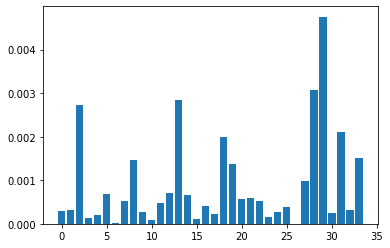

Attribute pat_geslacht_code has squared feature importance difference 5.0812792348576013e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 9.885588469183651e-06
Attribute subloc_0 has squared feature importance difference 0.00726538810224465
Attribute subloc_2 has squared feature importance difference 1.508127799133943e-06
Attribute subloc_3 has squared feature importance difference 1.5417997432324507e-05
Attribute subloc_4 has squared feature importance difference 0.00042412016718712645
Attribute subloc_5 has squared feature importance difference 1.3333825581843528e-06
Attribute subloc_6 has squared feature importance difference 0.00025767350902668434
Attribute subloc_7 has squared feature importance difference 0.0010220015226091287
Attribute subloc_8 has squared feature importance difference 6.26857511072196e-05
Attribute subloc_9 has squared feature importance difference 7.614546514153321e-08
Attribute stage_1 has squared feature importance differe

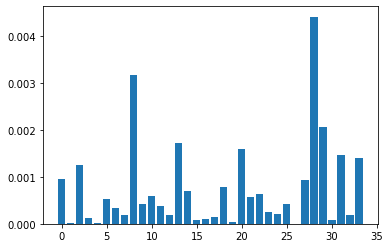

Attribute pat_geslacht_code has squared feature importance difference 0.00041501182169098653
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00016421959335214078
Attribute subloc_0 has squared feature importance difference 0.0020943561792667376
Attribute subloc_2 has squared feature importance difference 7.505230943712104e-07
Attribute subloc_3 has squared feature importance difference 6.7400978735276645e-06
Attribute subloc_4 has squared feature importance difference 0.0003684179271083624
Attribute subloc_5 has squared feature importance difference 0.00013376960565791233
Attribute subloc_6 has squared feature importance difference 3.524567908970525e-05
Attribute subloc_7 has squared feature importance difference 0.011348777512818129
Attribute subloc_8 has squared feature importance difference 0.0002229108271801696
Attribute subloc_9 has squared feature importance difference 0.0004066984512764176
Attribute stage_1 has squared feature importance differ

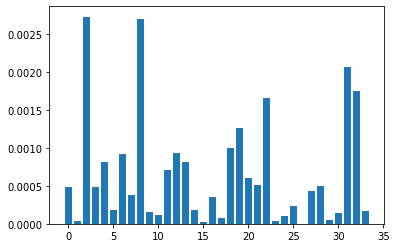

Attribute pat_geslacht_code has squared feature importance difference 2.5981847235109337e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0001302039181817286
Attribute subloc_0 has squared feature importance difference 0.013857044931771602
Attribute subloc_2 has squared feature importance difference 0.00025502946319423475
Attribute subloc_3 has squared feature importance difference 0.001089250084968234
Attribute subloc_4 has squared feature importance difference 4.094675877412455e-05
Attribute subloc_5 has squared feature importance difference 0.0015236646019102169
Attribute subloc_6 has squared feature importance difference 0.00025978796734944446
Attribute subloc_7 has squared feature importance difference 0.010789262000037918
Attribute subloc_8 has squared feature importance difference 3.0493556589128232e-05
Attribute subloc_9 has squared feature importance difference 6.777567558849916e-06
Attribute stage_1 has squared feature importance differen

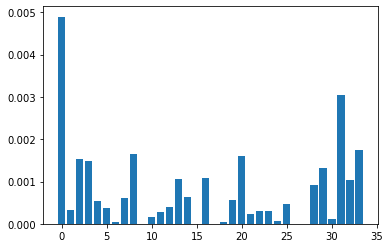

Attribute pat_geslacht_code has squared feature importance difference 0.02751703558986807
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.9838253841782896e-06
Attribute subloc_0 has squared feature importance difference 0.0029836720930948787
Attribute subloc_2 has squared feature importance difference 0.0024870865205654396
Attribute subloc_3 has squared feature importance difference 0.000284160155322286
Attribute subloc_4 has squared feature importance difference 0.0001644617279692167
Attribute subloc_5 has squared feature importance difference 6.719310982925997e-09
Attribute subloc_6 has squared feature importance difference 0.00046185973044611154
Attribute subloc_7 has squared feature importance difference 0.0021523804219237374
Attribute subloc_8 has squared feature importance difference 1.140869565762954e-06
Attribute subloc_9 has squared feature importance difference 1.0277022537481775e-05
Attribute stage_1 has squared feature importance differenc

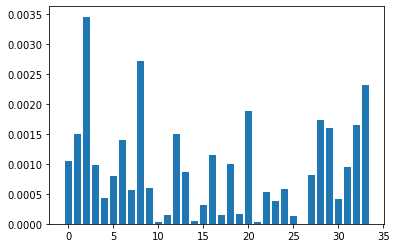

Attribute pat_geslacht_code has squared feature importance difference 0.00026815547551523527
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0011578525562749849
Attribute subloc_0 has squared feature importance difference 0.011240467180686432
Attribute subloc_2 has squared feature importance difference 0.0006295585404493118
Attribute subloc_3 has squared feature importance difference 0.0001140631803199388
Attribute subloc_4 has squared feature importance difference 0.0005671214847178193
Attribute subloc_5 has squared feature importance difference 0.0017812451667893181
Attribute subloc_6 has squared feature importance difference 0.00028401286146673534
Attribute subloc_7 has squared feature importance difference 0.0049098687648583125
Attribute subloc_8 has squared feature importance difference 0.00031755671969706934
Attribute subloc_9 has squared feature importance difference 4.345681756575902e-06
Attribute stage_1 has squared feature importance differe

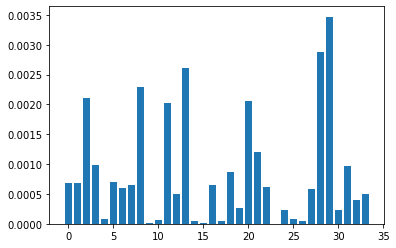

Attribute pat_geslacht_code has squared feature importance difference 5.279102397447354e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00010005878746779972
Attribute subloc_0 has squared feature importance difference 0.004828969500267432
Attribute subloc_2 has squared feature importance difference 0.0007944405930949615
Attribute subloc_3 has squared feature importance difference 1.0528821243743965e-08
Attribute subloc_4 has squared feature importance difference 0.0005154390222767322
Attribute subloc_5 has squared feature importance difference 0.0003666552966957989
Attribute subloc_6 has squared feature importance difference 0.00046353095907159105
Attribute subloc_7 has squared feature importance difference 0.003979459788278065
Attribute subloc_8 has squared feature importance difference 5.050307658760953e-07
Attribute subloc_9 has squared feature importance difference 2.4801709729418515e-07
Attribute stage_1 has squared feature importance differe

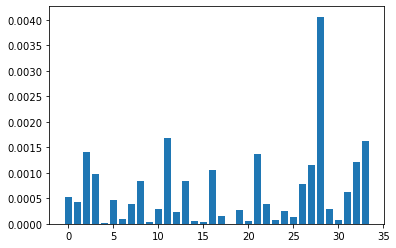

Attribute pat_geslacht_code has squared feature importance difference 5.937593840802655e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 3.733275380884916e-05
Attribute subloc_0 has squared feature importance difference 0.0038232581924947154
Attribute subloc_2 has squared feature importance difference 0.0015369290550731453
Attribute subloc_3 has squared feature importance difference 4.742739749615692e-06
Attribute subloc_4 has squared feature importance difference 0.00040827603588494953
Attribute subloc_5 has squared feature importance difference 9.316450465261303e-06
Attribute subloc_6 has squared feature importance difference 0.00028168173510050715
Attribute subloc_7 has squared feature importance difference 0.0005471550251870015
Attribute subloc_8 has squared feature importance difference 7.62108673207812e-08
Attribute subloc_9 has squared feature importance difference 0.00010579642064799779
Attribute stage_1 has squared feature importance differe

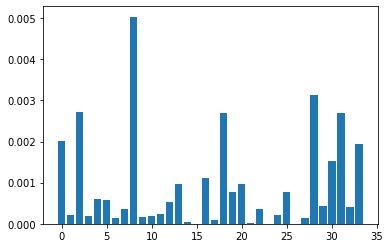

Attribute pat_geslacht_code has squared feature importance difference 0.0022812449505574236
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.558057579361014e-05
Attribute subloc_0 has squared feature importance difference 0.0071474632770511535
Attribute subloc_2 has squared feature importance difference 7.64353744749036e-07
Attribute subloc_3 has squared feature importance difference 0.00026590644992796603
Attribute subloc_4 has squared feature importance difference 0.0002831068928107854
Attribute subloc_5 has squared feature importance difference 6.530627308801997e-06
Attribute subloc_6 has squared feature importance difference 0.00011254236511329947
Attribute subloc_7 has squared feature importance difference 0.021256875230700707
Attribute subloc_8 has squared feature importance difference 2.0706089353261902e-05
Attribute subloc_9 has squared feature importance difference 1.0474264492413846e-05
Attribute stage_1 has squared feature importance differe

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

Only one class left in synthetic dataset, no Logistic Regression possible. Coefficients are set to 0
Attribute pat_geslacht_code has squared feature importance difference 0.0022812449505574236
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.558057579361014e-05
Attribute subloc_0 has squared feature importance difference 0.0071474632770511535
Attribute subloc_2 has squared feature importance difference 7.64353744749036e-07
Attribute subloc_3 has squared feature importance difference 0.00026590644992796603
Attribute subloc_4 has squared feature importance difference 0.0002831068928107854
Attribute subloc_5 has squared feature importance difference 6.530627308801997e-06
Attribute subloc_6 has squared feature importance difference 0.00011254236511329947
Attribute subloc_7 has squared feature importance difference 0.021256875230700707
Attribute subloc_8 has squared feature importance difference 2.0706089353261902e-05
Attribute subloc_9 has squared feature 

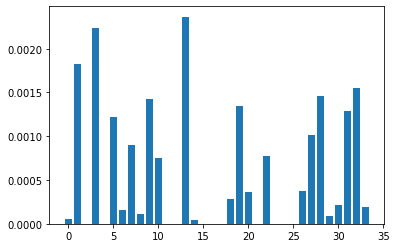

Attribute pat_geslacht_code has squared feature importance difference 0.0001854875691292771
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.006022905394768413
Attribute subloc_0 has squared feature importance difference 7.162508564286353e-06
Attribute subloc_2 has squared feature importance difference 0.011279662203101126
Attribute subloc_3 has squared feature importance difference 8.246788352167005e-06
Attribute subloc_4 has squared feature importance difference 0.0035500530974252016
Attribute subloc_5 has squared feature importance difference 3.662727272831058e-05
Attribute subloc_6 has squared feature importance difference 0.0019519093873135182
Attribute subloc_7 has squared feature importance difference 9.534853037891822e-05
Attribute subloc_8 has squared feature importance difference 0.004890531778245054
Attribute subloc_9 has squared feature importance difference 0.0012214534628944285
Attribute stage_1 has squared feature importance difference 0

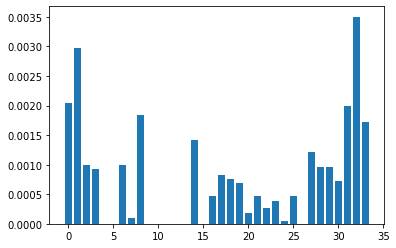

Attribute pat_geslacht_code has squared feature importance difference 0.003518266052081872
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.009431066285189063
Attribute subloc_0 has squared feature importance difference 0.0011665942488720688
Attribute subloc_2 has squared feature importance difference 0.0008440504246955787
Attribute subloc_3 has squared feature importance difference 8.246788352167005e-06
Attribute subloc_4 has squared feature importance difference 2.313978952280606e-06
Attribute subloc_5 has squared feature importance difference 0.0012523198385672861
Attribute subloc_6 has squared feature importance difference 7.157041553233968e-06
Attribute subloc_7 has squared feature importance difference 0.0028025650732835653
Attribute subloc_8 has squared feature importance difference 1.140869565762954e-06
Attribute subloc_9 has squared feature importance difference 7.673438360013157e-06
Attribute stage_1 has squared feature importance difference 

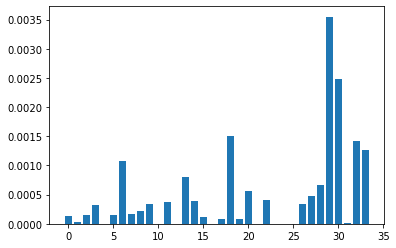

Attribute pat_geslacht_code has squared feature importance difference 7.742517607408456e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00011959638580502628
Attribute subloc_0 has squared feature importance difference 3.4694358490565016e-05
Attribute subloc_2 has squared feature importance difference 0.00018722281062009486
Attribute subloc_3 has squared feature importance difference 8.246788352167005e-06
Attribute subloc_4 has squared feature importance difference 5.632322283922556e-05
Attribute subloc_5 has squared feature importance difference 0.0037292470314757454
Attribute subloc_6 has squared feature importance difference 8.6560449409548e-05
Attribute subloc_7 has squared feature importance difference 6.690360386984767e-06
Attribute subloc_8 has squared feature importance difference 0.0003606356402946334
Attribute subloc_9 has squared feature importance difference 7.673438360013157e-06
Attribute stage_1 has squared feature importance differen

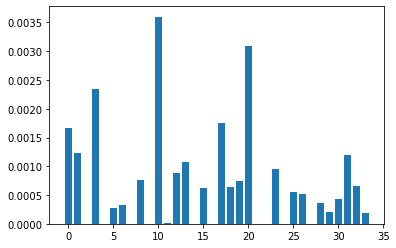

Attribute pat_geslacht_code has squared feature importance difference 0.0027743224997728456
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.001422157726848441
Attribute subloc_0 has squared feature importance difference 7.162508564286353e-06
Attribute subloc_2 has squared feature importance difference 0.008507535163290468
Attribute subloc_3 has squared feature importance difference 8.246788352167005e-06
Attribute subloc_4 has squared feature importance difference 9.635503103195912e-05
Attribute subloc_5 has squared feature importance difference 0.0001366029780716881
Attribute subloc_6 has squared feature importance difference 8.269643881715186e-07
Attribute subloc_7 has squared feature importance difference 0.00026277519969535826
Attribute subloc_8 has squared feature importance difference 1.140869565762954e-06
Attribute subloc_9 has squared feature importance difference 0.021628110952364714
Attribute stage_1 has squared feature importance difference 

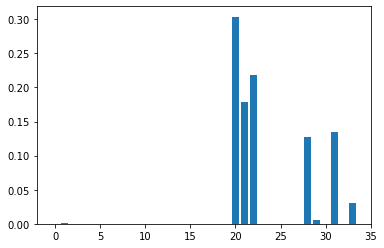

syn: DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00000
Feature: tum_differentiatiegraad_code Score: 0.00000
Feature: subloc_0 Score: 0.00000
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00000
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 1.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.00000
Feature: stage_4A Score: 0.00000
Feature: stage_4B Score: 0.00000
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

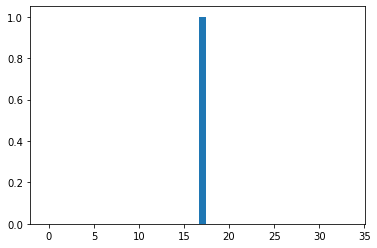

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

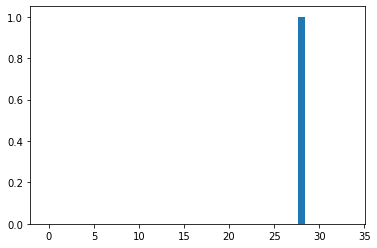

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

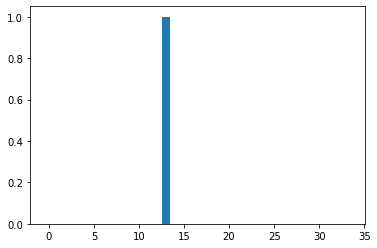

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 1.0
Attribute

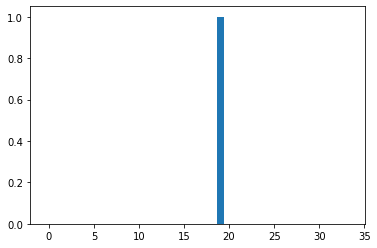

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

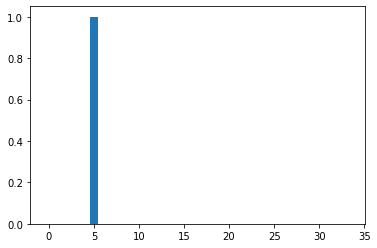

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 1.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

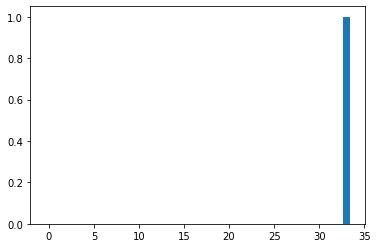

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

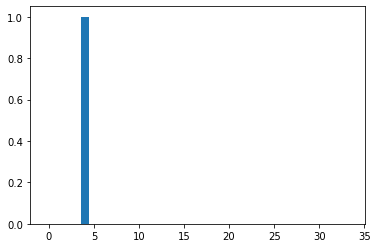

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 1.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

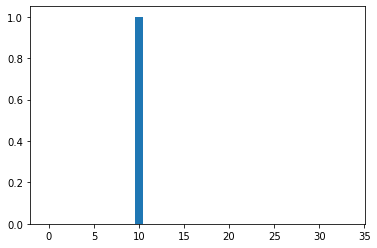

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 1.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

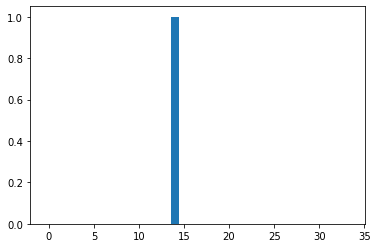

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

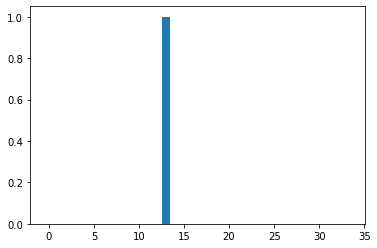

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 1.0
Attribute

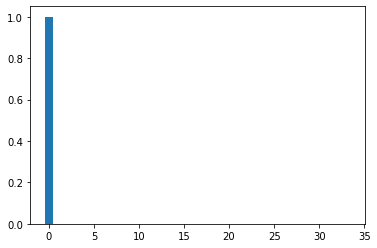

Attribute pat_geslacht_code has squared feature importance difference 0.9993802902395562
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute st

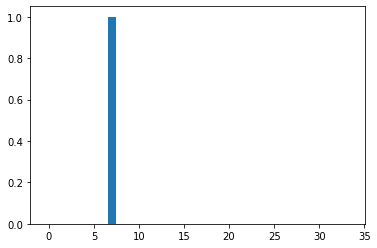

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 1.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

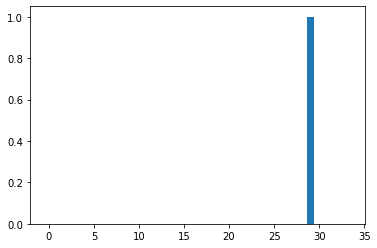

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

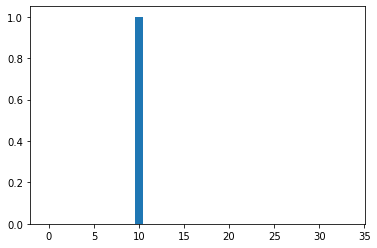

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 1.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

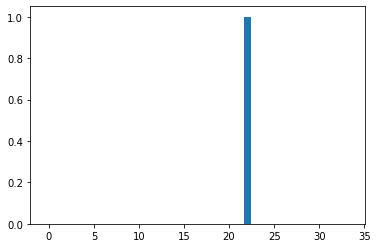

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

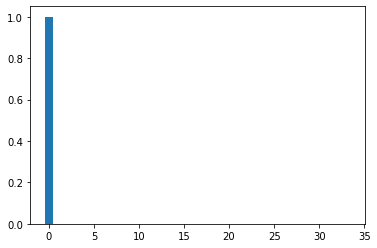

Attribute pat_geslacht_code has squared feature importance difference 0.9993802902395562
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute st

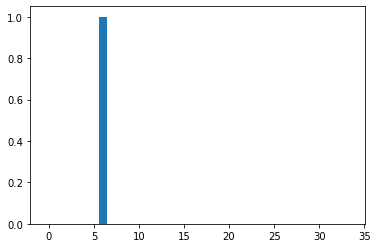

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 1.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

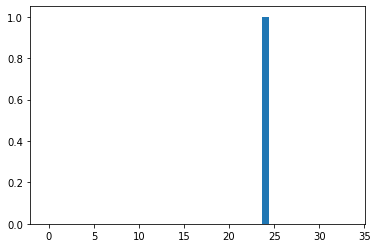

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

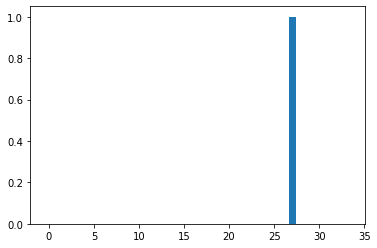

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

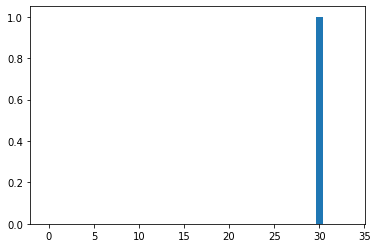

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

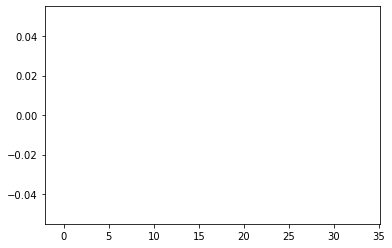

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

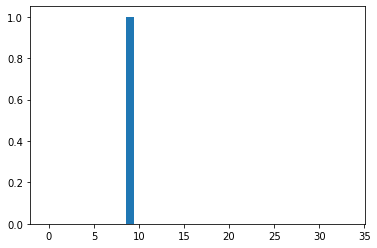

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 1.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

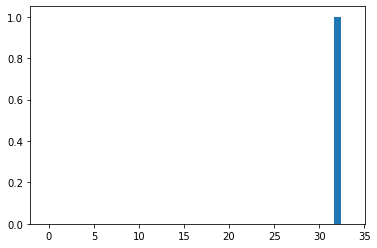

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

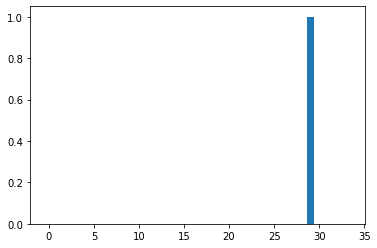

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

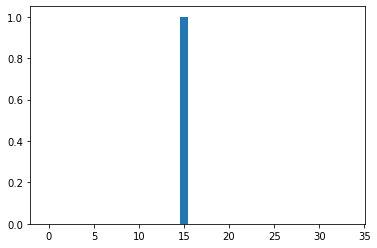

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

In [13]:
# Do for one DP algorithm at a time for normalized coefficients
privacy_levels = ms_privacy_levels

norm_ms_FID_ORI, norm_ms_FID, norm_ms_FID_ERRORS = NormalizedFIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

Applied model is LogisticRegression
Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
diagnosis_age_0-20 present in original data, thus added to validation data with value 0
ori: LogisticRegression(C=1, max_iter=4000)
accuracy of original model is 0.6175825007568877
Feature: pat_geslacht_code Score: 0.12195
Feature: tum_differentiatiegraad_code Score: 0.09789
Feature: subloc_0 Score: 0.01982
Feature: subloc_2 Score: 0.04114
Feature: subloc_3 Score: 0.02126
Feature: subloc_4 Score: 0.01126
Feature: subloc_5 Score: 0.01181
Feature: subloc_6 Score: 0.00673
Feature: subloc_7 Score: 0.11393
Feature: subloc_8 Score: 0.00791
Feature: subloc_9 Score: 0.02051
Feature: stage_1 Score: 0.79810
Feature: stage_2 Score: 0.47386
Feature: stage_2A Score: 0.73681
Feature: stage_2B Score: 0.17041
Feature: stage_2C Score: 0.06630
Feature: stage_3 Score: 0.20728
Feature: stage_3A Score: 0.19671
Feature: stage_3B Score: 0.34886
Feature: stage_3C Score: 0.04840
Feature: stage_

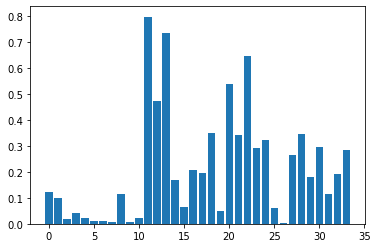

Numerical variables scaled: ['tum_differentiatiegraad_code', 'pat_geslacht_code']
syn: LogisticRegression(C=1, max_iter=4000)
Feature: pat_geslacht_code Score: 0.09854
Feature: tum_differentiatiegraad_code Score: 0.05605
Feature: subloc_0 Score: 0.03340
Feature: subloc_2 Score: 0.00957
Feature: subloc_3 Score: 0.03824
Feature: subloc_4 Score: 0.03038
Feature: subloc_5 Score: 0.01561
Feature: subloc_6 Score: 0.00929
Feature: subloc_7 Score: 0.04918
Feature: subloc_8 Score: 0.00948
Feature: subloc_9 Score: 0.00596
Feature: stage_1 Score: 0.54134
Feature: stage_2 Score: 0.27873
Feature: stage_2A Score: 0.47311
Feature: stage_2B Score: 0.07601
Feature: stage_2C Score: 0.03249
Feature: stage_3 Score: 0.10245
Feature: stage_3A Score: 0.13936
Feature: stage_3B Score: 0.22798
Feature: stage_3C Score: 0.02418
Feature: stage_4 Score: 0.60613
Feature: stage_4A Score: 0.37462
Feature: stage_4B Score: 0.51353
Feature: stage_4C Score: 0.03682
Feature: stage_M Score: 0.13790
Feature: stage_X Score: 0

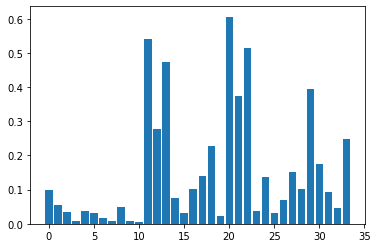

Attribute pat_geslacht_code has squared feature importance difference 5.5507533381688105e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 6.309588691517241e-06
Attribute subloc_0 has squared feature importance difference 1.3717633964735798e-05
Attribute subloc_2 has squared feature importance difference 1.3891809727119128e-05
Attribute subloc_3 has squared feature importance difference 1.964747050231664e-05
Attribute subloc_4 has squared feature importance difference 1.834394732390844e-05
Attribute subloc_5 has squared feature importance difference 1.923279777217968e-06
Attribute subloc_6 has squared feature importance difference 7.472340588569888e-07
Attribute subloc_7 has squared feature importance difference 3.5889197657923816e-05
Attribute subloc_8 has squared feature importance difference 5.517037066405084e-07
Attribute subloc_9 has squared feature importance difference 2.6615998927797655e-06
Attribute stage_1 has squared feature importance diff

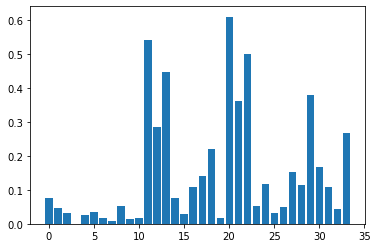

Attribute pat_geslacht_code has squared feature importance difference 2.1716138779034635e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.6266889065606898e-05
Attribute subloc_0 has squared feature importance difference 1.1425165184451548e-05
Attribute subloc_2 has squared feature importance difference 2.899689210698258e-05
Attribute subloc_3 has squared feature importance difference 5.496654121246166e-06
Attribute subloc_4 has squared feature importance difference 2.555702445016079e-05
Attribute subloc_5 has squared feature importance difference 2.9604107089644664e-06
Attribute subloc_6 has squared feature importance difference 2.269104285803789e-07
Attribute subloc_7 has squared feature importance difference 2.9201495509264388e-05
Attribute subloc_8 has squared feature importance difference 3.7128834881050125e-06
Attribute subloc_9 has squared feature importance difference 9.975975413477734e-08
Attribute stage_1 has squared feature importance dif

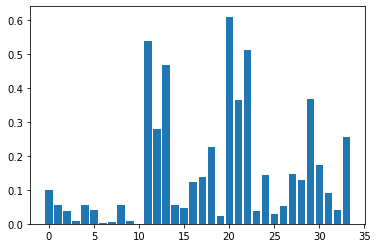

Attribute pat_geslacht_code has squared feature importance difference 6.757761140670173e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.972873068672538e-06
Attribute subloc_0 has squared feature importance difference 2.324800409155284e-05
Attribute subloc_2 has squared feature importance difference 1.4216820569037358e-05
Attribute subloc_3 has squared feature importance difference 6.168737650428705e-05
Attribute subloc_4 has squared feature importance difference 3.8052248505916285e-05
Attribute subloc_5 has squared feature importance difference 9.184504001597901e-07
Attribute subloc_6 has squared feature importance difference 9.09553881275322e-08
Attribute subloc_7 has squared feature importance difference 2.172401034332457e-05
Attribute subloc_8 has squared feature importance difference 6.18562246371616e-08
Attribute subloc_9 has squared feature importance difference 7.3523136242164645e-06
Attribute stage_1 has squared feature importance differen

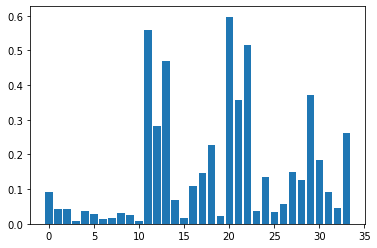

Attribute pat_geslacht_code has squared feature importance difference 1.814876240868123e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 2.5526463386378588e-05
Attribute subloc_0 has squared feature importance difference 3.3424574630601264e-05
Attribute subloc_2 has squared feature importance difference 1.66462168290498e-05
Attribute subloc_3 has squared feature importance difference 1.659366431711142e-05
Attribute subloc_4 has squared feature importance difference 1.3320159412631607e-05
Attribute subloc_5 has squared feature importance difference 8.815100093132943e-07
Attribute subloc_6 has squared feature importance difference 4.457399147671197e-06
Attribute subloc_7 has squared feature importance difference 8.758466139471533e-05
Attribute subloc_8 has squared feature importance difference 1.3642181075582648e-05
Attribute subloc_9 has squared feature importance difference 1.802961096640663e-06
Attribute stage_1 has squared feature importance differ

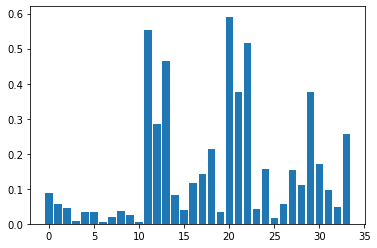

Attribute pat_geslacht_code has squared feature importance difference 1.7655123063082558e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 7.0204374746731455e-06
Attribute subloc_0 has squared feature importance difference 3.5729498768380936e-05
Attribute subloc_2 has squared feature importance difference 1.4205754496005463e-05
Attribute subloc_3 has squared feature importance difference 1.1619344709432934e-05
Attribute subloc_4 has squared feature importance difference 2.2500035176020145e-05
Attribute subloc_5 has squared feature importance difference 5.365850275799366e-07
Attribute subloc_6 has squared feature importance difference 7.152431176943068e-06
Attribute subloc_7 has squared feature importance difference 7.428914303660043e-05
Attribute subloc_8 has squared feature importance difference 1.3104743313403852e-05
Attribute subloc_9 has squared feature importance difference 2.643411951357007e-06
Attribute stage_1 has squared feature importance di

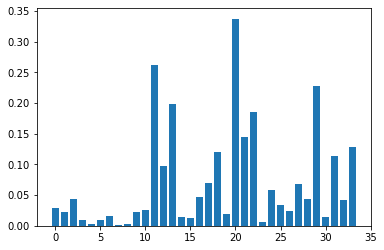

Attribute pat_geslacht_code has squared feature importance difference 1.9092205172004972e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.858579245874817e-05
Attribute subloc_0 has squared feature importance difference 0.0002270342895036023
Attribute subloc_2 has squared feature importance difference 2.0037480213823558e-06
Attribute subloc_3 has squared feature importance difference 2.192260674415151e-06
Attribute subloc_4 has squared feature importance difference 4.262260627511861e-06
Attribute subloc_5 has squared feature importance difference 2.686921366520506e-05
Attribute subloc_6 has squared feature importance difference 2.374092328572884e-09
Attribute subloc_7 has squared feature importance difference 0.00019320565092464186
Attribute subloc_8 has squared feature importance difference 7.061586479541399e-05
Attribute subloc_9 has squared feature importance difference 5.5634291360560044e-05
Attribute stage_1 has squared feature importance diffe

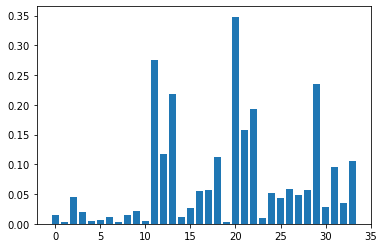

Attribute pat_geslacht_code has squared feature importance difference 0.00010942199661065707
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00014127903481845754
Attribute subloc_0 has squared feature importance difference 0.00022763105473437066
Attribute subloc_2 has squared feature importance difference 4.560887526356664e-06
Attribute subloc_3 has squared feature importance difference 5.373003278863099e-07
Attribute subloc_4 has squared feature importance difference 7.405800697543973e-07
Attribute subloc_5 has squared feature importance difference 8.377453902926445e-06
Attribute subloc_6 has squared feature importance difference 1.943567890167541e-07
Attribute subloc_7 has squared feature importance difference 8.573713620117514e-05
Attribute subloc_8 has squared feature importance difference 5.4452518096303035e-05
Attribute subloc_9 has squared feature importance difference 3.2405513176827304e-07
Attribute stage_1 has squared feature importance diff

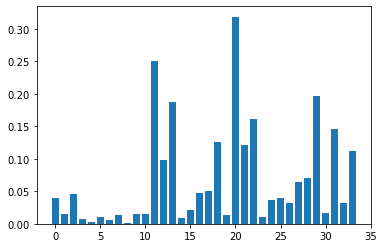

Attribute pat_geslacht_code has squared feature importance difference 5.183791551257611e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.5484844859178596e-05
Attribute subloc_0 has squared feature importance difference 0.0002963333883823258
Attribute subloc_2 has squared feature importance difference 7.0815771799497285e-06
Attribute subloc_3 has squared feature importance difference 2.535947144598564e-06
Attribute subloc_4 has squared feature importance difference 8.414829633352178e-06
Attribute subloc_5 has squared feature importance difference 1.1000382536200019e-06
Attribute subloc_6 has squared feature importance difference 2.1641230903950543e-05
Attribute subloc_7 has squared feature importance difference 0.0002280389908161593
Attribute subloc_8 has squared feature importance difference 2.6139747651336564e-05
Attribute subloc_9 has squared feature importance difference 1.2485037831630935e-05
Attribute stage_1 has squared feature importance dif

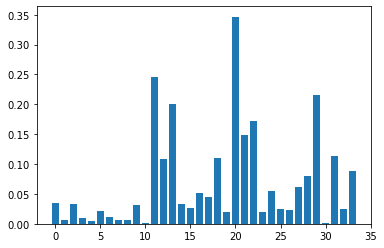

Attribute pat_geslacht_code has squared feature importance difference 3.4954587653698176e-06
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00010402573628969193
Attribute subloc_0 has squared feature importance difference 0.00012928065858232014
Attribute subloc_2 has squared feature importance difference 2.624277487763619e-06
Attribute subloc_3 has squared feature importance difference 6.798681244028967e-07
Attribute subloc_4 has squared feature importance difference 5.1115193610778615e-05
Attribute subloc_5 has squared feature importance difference 1.0169138968617166e-05
Attribute subloc_6 has squared feature importance difference 2.4655977799893343e-06
Attribute subloc_7 has squared feature importance difference 0.00016873756184871108
Attribute subloc_8 has squared feature importance difference 0.0001402748946597508
Attribute subloc_9 has squared feature importance difference 3.7517326866729903e-06
Attribute stage_1 has squared feature importance d

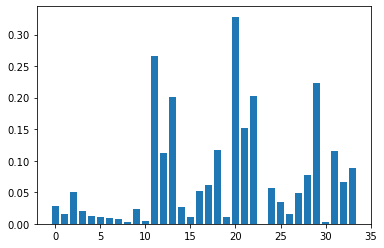

Attribute pat_geslacht_code has squared feature importance difference 2.2510312259441587e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.485382743662017e-05
Attribute subloc_0 has squared feature importance difference 0.0003094134025538226
Attribute subloc_2 has squared feature importance difference 6.527421657558501e-06
Attribute subloc_3 has squared feature importance difference 4.895023310907915e-06
Attribute subloc_4 has squared feature importance difference 7.270217137167247e-06
Attribute subloc_5 has squared feature importance difference 3.777158192917389e-06
Attribute subloc_6 has squared feature importance difference 4.500947323735132e-06
Attribute subloc_7 has squared feature importance difference 0.00019462289339371684
Attribute subloc_8 has squared feature importance difference 7.360113617191384e-05
Attribute subloc_9 has squared feature importance difference 1.5274750875999616e-06
Attribute stage_1 has squared feature importance differ

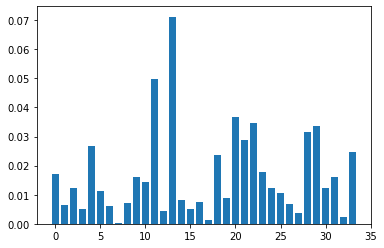

Attribute pat_geslacht_code has squared feature importance difference 0.00018446822523213058
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.146651848829864e-06
Attribute subloc_0 has squared feature importance difference 0.00034269382388612196
Attribute subloc_2 has squared feature importance difference 9.663071057478387e-06
Attribute subloc_3 has squared feature importance difference 0.0019283600900894414
Attribute subloc_4 has squared feature importance difference 0.00033495391367863506
Attribute subloc_5 has squared feature importance difference 8.366633690368241e-05
Attribute subloc_6 has squared feature importance difference 6.217360227753306e-08
Attribute subloc_7 has squared feature importance difference 7.2681567555980485e-06
Attribute subloc_8 has squared feature importance difference 0.0007204961877324093
Attribute subloc_9 has squared feature importance difference 0.0004859072197577611
Attribute stage_1 has squared feature importance diffe

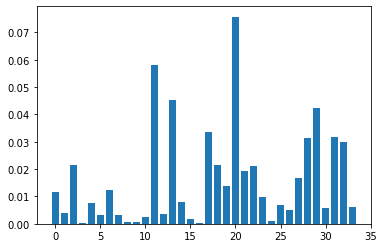

Attribute pat_geslacht_code has squared feature importance difference 1.886967865251235e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 4.115614842470973e-05
Attribute subloc_0 has squared feature importance difference 0.0012842043751320343
Attribute subloc_2 has squared feature importance difference 2.5409180773794683e-05
Attribute subloc_3 has squared feature importance difference 0.00011340681985627615
Attribute subloc_4 has squared feature importance difference 1.609671411256363e-05
Attribute subloc_5 has squared feature importance difference 0.00041438918947975625
Attribute subloc_6 has squared feature importance difference 2.398966891926576e-05
Attribute subloc_7 has squared feature importance difference 0.00019390946397023805
Attribute subloc_8 has squared feature importance difference 3.627179124410728e-08
Attribute subloc_9 has squared feature importance difference 1.941184151347888e-06
Attribute stage_1 has squared feature importance diffe

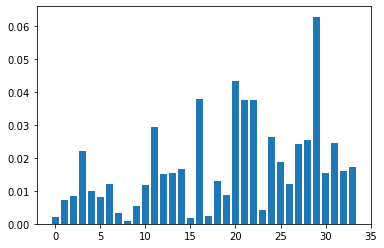

Attribute pat_geslacht_code has squared feature importance difference 0.0001751873880839974
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.6540965934136248e-06
Attribute subloc_0 has squared feature importance difference 0.00012834689975623268
Attribute subloc_2 has squared feature importance difference 0.0009804956780578651
Attribute subloc_3 has squared feature importance difference 0.00019342050288937812
Attribute subloc_4 has squared feature importance difference 0.00014536716531594497
Attribute subloc_5 has squared feature importance difference 0.00033913787677877354
Attribute subloc_6 has squared feature importance difference 1.970001914324739e-05
Attribute subloc_7 has squared feature importance difference 0.00019298089127320385
Attribute subloc_8 has squared feature importance difference 6.686515618770934e-05
Attribute subloc_9 has squared feature importance difference 0.000286146788701176
Attribute stage_1 has squared feature importance diff

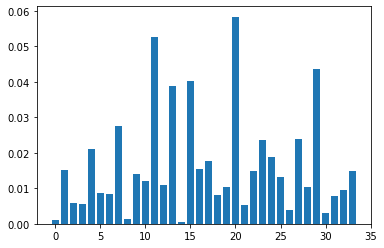

Attribute pat_geslacht_code has squared feature importance difference 0.00021604478358185848
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00018344021625713884
Attribute subloc_0 has squared feature importance difference 6.219775895100456e-05
Attribute subloc_2 has squared feature importance difference 1.9938105268779477e-05
Attribute subloc_3 has squared feature importance difference 0.0011843724726659148
Attribute subloc_4 has squared feature importance difference 0.00019513116447400058
Attribute subloc_5 has squared feature importance difference 0.00017749416593840827
Attribute subloc_6 has squared feature importance difference 0.0022503049072791774
Attribute subloc_7 has squared feature importance difference 0.00016525661193159762
Attribute subloc_8 has squared feature importance difference 0.0005694899853411781
Attribute subloc_9 has squared feature importance difference 0.00034329803551974645
Attribute stage_1 has squared feature importance di

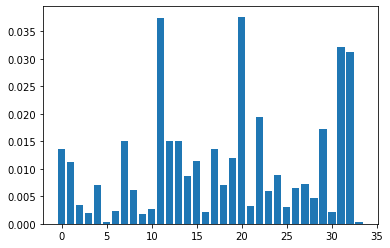

Attribute pat_geslacht_code has squared feature importance difference 0.0004198619470847184
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00030384619084022164
Attribute subloc_0 has squared feature importance difference 4.152532211070547e-05
Attribute subloc_2 has squared feature importance difference 7.995444725450669e-08
Attribute subloc_3 has squared feature importance difference 0.00026118573304015596
Attribute subloc_4 has squared feature importance difference 2.9466530735023595e-07
Attribute subloc_5 has squared feature importance difference 2.2539182781012977e-05
Attribute subloc_6 has squared feature importance difference 0.0016057975614688627
Attribute subloc_7 has squared feature importance difference 1.6775989379742671e-06
Attribute subloc_8 has squared feature importance difference 1.3375296203105293e-05
Attribute subloc_9 has squared feature importance difference 2.2199912568768655e-05
Attribute stage_1 has squared feature importance di

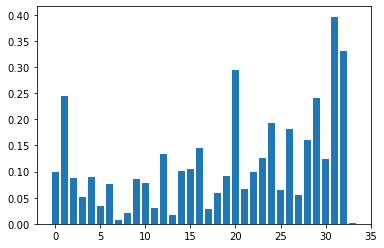

Attribute pat_geslacht_code has squared feature importance difference 7.740796893437529e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0024070103337619645
Attribute subloc_0 has squared feature importance difference 0.0003799871282146611
Attribute subloc_2 has squared feature importance difference 6.035604834962784e-05
Attribute subloc_3 has squared feature importance difference 0.00039273065684961185
Attribute subloc_4 has squared feature importance difference 5.2414421596209146e-05
Attribute subloc_5 has squared feature importance difference 0.0003221187761177533
Attribute subloc_6 has squared feature importance difference 8.164977725459319e-07
Attribute subloc_7 has squared feature importance difference 0.0001028999726077224
Attribute subloc_8 has squared feature importance difference 0.00044170860816967675
Attribute subloc_9 has squared feature importance difference 0.00029190114537655493
Attribute stage_1 has squared feature importance diffe

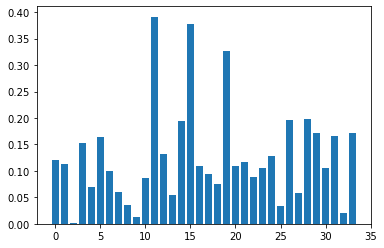

Attribute pat_geslacht_code has squared feature importance difference 0.00012490145761837846
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00016394585632978072
Attribute subloc_0 has squared feature importance difference 4.516940657976988e-06
Attribute subloc_2 has squared feature importance difference 0.0008719557441553406
Attribute subloc_3 has squared feature importance difference 0.00017205202336415904
Attribute subloc_4 has squared feature importance difference 0.0013294880407321806
Attribute subloc_5 has squared feature importance difference 0.00046673452003283706
Attribute subloc_6 has squared feature importance difference 0.00016530866019393367
Attribute subloc_7 has squared feature importance difference 5.4353940639049825e-05
Attribute subloc_8 has squared feature importance difference 3.6168172786501952e-06
Attribute subloc_9 has squared feature importance difference 0.00028857836409601836
Attribute stage_1 has squared feature importance d

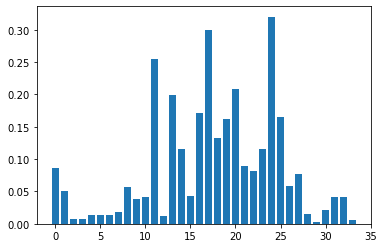

Attribute pat_geslacht_code has squared feature importance difference 0.0001591545394798829
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.412755014039635e-05
Attribute subloc_0 has squared feature importance difference 3.695573405335727e-08
Attribute subloc_2 has squared feature importance difference 9.9599056964203e-06
Attribute subloc_3 has squared feature importance difference 2.350647016553601e-06
Attribute subloc_4 has squared feature importance difference 8.847990968058238e-06
Attribute subloc_5 has squared feature importance difference 8.724027876305808e-06
Attribute subloc_6 has squared feature importance difference 2.7741261976810726e-05
Attribute subloc_7 has squared feature importance difference 1.1881789977403185e-05
Attribute subloc_8 has squared feature importance difference 0.00013801352847040194
Attribute subloc_9 has squared feature importance difference 0.00012209416559702456
Attribute stage_1 has squared feature importance differe

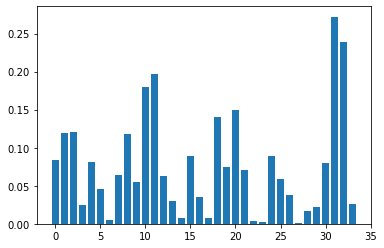

Attribute pat_geslacht_code has squared feature importance difference 0.00023680458977037893
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0010618709739318966
Attribute subloc_0 has squared feature importance difference 0.0019077928960833258
Attribute subloc_2 has squared feature importance difference 1.356951664075697e-05
Attribute subloc_3 has squared feature importance difference 0.0007967250903635845
Attribute subloc_4 has squared feature importance difference 0.00025662146601942315
Attribute subloc_5 has squared feature importance difference 2.0531998582209446e-07
Attribute subloc_6 has squared feature importance difference 0.0005606101720869195
Attribute subloc_7 has squared feature importance difference 0.0008937426940363991
Attribute subloc_8 has squared feature importance difference 0.00039676471196241873
Attribute subloc_9 has squared feature importance difference 0.004388987077473256
Attribute stage_1 has squared feature importance differ

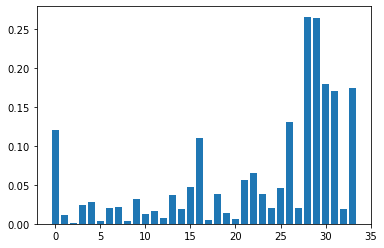

Attribute pat_geslacht_code has squared feature importance difference 0.001816873257745808
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.6211355830978385e-05
Attribute subloc_0 has squared feature importance difference 3.7442122575439137e-06
Attribute subloc_2 has squared feature importance difference 3.785623515855862e-05
Attribute subloc_3 has squared feature importance difference 0.0001200790784346399
Attribute subloc_4 has squared feature importance difference 1.1327193146966015e-07
Attribute subloc_5 has squared feature importance difference 6.901401612103722e-05
Attribute subloc_6 has squared feature importance difference 9.061445382189816e-05
Attribute subloc_7 has squared feature importance difference 0.00018168117554324273
Attribute subloc_8 has squared feature importance difference 0.00021632803989017198
Attribute subloc_9 has squared feature importance difference 1.2391938608175909e-05
Attribute stage_1 has squared feature importance diff

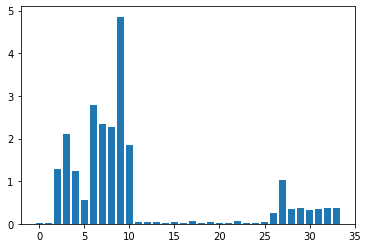

Attribute pat_geslacht_code has squared feature importance difference 0.00023880181098651567
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00016403872182571655
Attribute subloc_0 has squared feature importance difference 0.0027263686403935818
Attribute subloc_2 has squared feature importance difference 0.007160166121456958
Attribute subloc_3 has squared feature importance difference 0.0025484663034433964
Attribute subloc_4 has squared feature importance difference 0.00048435033235096184
Attribute subloc_5 has squared feature importance difference 0.013923341463020725
Attribute subloc_6 has squared feature importance difference 0.009866020039117945
Attribute subloc_7 has squared feature importance difference 0.006821019031544547
Attribute subloc_8 has squared feature importance difference 0.04304458542243659
Attribute subloc_9 has squared feature importance difference 0.005915223805624232
Attribute stage_1 has squared feature importance difference 0.

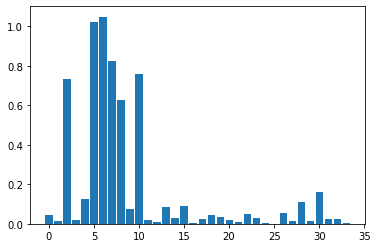

Attribute pat_geslacht_code has squared feature importance difference 7.987074750572808e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0001260011922959342
Attribute subloc_0 has squared feature importance difference 0.013513613945630179
Attribute subloc_2 has squared feature importance difference 4.543336763397715e-06
Attribute subloc_3 has squared feature importance difference 0.0003062129662407732
Attribute subloc_4 has squared feature importance difference 0.02707073598862479
Attribute subloc_5 has squared feature importance difference 0.02837911562019964
Attribute subloc_6 has squared feature importance difference 0.017635378195412225
Attribute subloc_7 has squared feature importance difference 0.007425459842763864
Attribute subloc_8 has squared feature importance difference 0.00012639767663639014
Attribute subloc_9 has squared feature importance difference 0.01448752203483039
Attribute stage_1 has squared feature importance difference 0.0109

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\bde2002.53381\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    " class: %r" % classes_[0])
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0

  FitFailedWarning)
C:\Users\bde2002.53381\AppData\Roaming\Python\Python

Only one class left in synthetic dataset, no Logistic Regression possible. Coefficients are set to 0
Attribute pat_geslacht_code has squared feature importance difference 7.987074750572808e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0001260011922959342
Attribute subloc_0 has squared feature importance difference 0.013513613945630179
Attribute subloc_2 has squared feature importance difference 4.543336763397715e-06
Attribute subloc_3 has squared feature importance difference 0.0003062129662407732
Attribute subloc_4 has squared feature importance difference 0.02707073598862479
Attribute subloc_5 has squared feature importance difference 0.02837911562019964
Attribute subloc_6 has squared feature importance difference 0.017635378195412225
Attribute subloc_7 has squared feature importance difference 0.007425459842763864
Attribute subloc_8 has squared feature importance difference 0.00012639767663639014
Attribute subloc_9 has squared feature importa

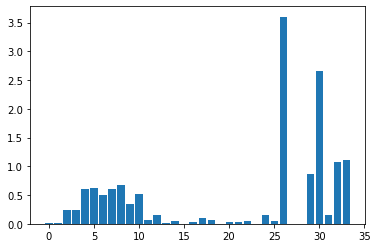

Attribute pat_geslacht_code has squared feature importance difference 0.00025186365283246757
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00014949273425099617
Attribute subloc_0 has squared feature importance difference 0.00019391883368621854
Attribute subloc_2 has squared feature importance difference 0.0001118386138222407
Attribute subloc_3 has squared feature importance difference 0.0015051331938644532
Attribute subloc_4 has squared feature importance difference 0.0016632389581140797
Attribute subloc_5 has squared feature importance difference 0.001107000910470377
Attribute subloc_6 has squared feature importance difference 0.0016618761794686848
Attribute subloc_7 has squared feature importance difference 0.0009566861341435448
Attribute subloc_8 has squared feature importance difference 0.0004953483851598975
Attribute subloc_9 has squared feature importance difference 0.0010364204152844216
Attribute stage_1 has squared feature importance differe

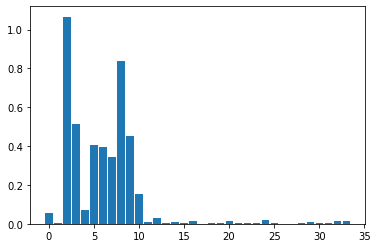

Attribute pat_geslacht_code has squared feature importance difference 1.850298202932896e-05
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.00014075064825859823
Attribute subloc_0 has squared feature importance difference 0.05508489377322311
Attribute subloc_2 has squared feature importance difference 0.011814161080096724
Attribute subloc_3 has squared feature importance difference 0.00017484577875941839
Attribute subloc_4 has squared feature importance difference 0.007932718180902567
Attribute subloc_5 has squared feature importance difference 0.007467657417050771
Attribute subloc_6 has squared feature importance difference 0.005760002574177543
Attribute subloc_7 has squared feature importance difference 0.029197337475682216
Attribute subloc_8 has squared feature importance difference 0.010015057582161901
Attribute subloc_9 has squared feature importance difference 0.0009966949537645491
Attribute stage_1 has squared feature importance difference 0.01

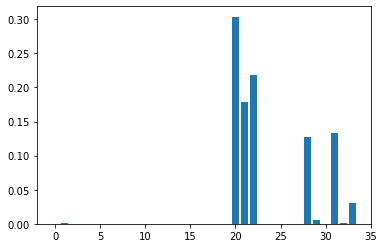

syn: DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=0.005)
Feature: pat_geslacht_code Score: 0.00012
Feature: tum_differentiatiegraad_code Score: 0.00056
Feature: subloc_0 Score: 0.00061
Feature: subloc_2 Score: 0.00000
Feature: subloc_3 Score: 0.00000
Feature: subloc_4 Score: 0.00000
Feature: subloc_5 Score: 0.00000
Feature: subloc_6 Score: 0.00000
Feature: subloc_7 Score: 0.00037
Feature: subloc_8 Score: 0.00000
Feature: subloc_9 Score: 0.00000
Feature: stage_1 Score: 0.00000
Feature: stage_2 Score: 0.00000
Feature: stage_2A Score: 0.00000
Feature: stage_2B Score: 0.00000
Feature: stage_2C Score: 0.00000
Feature: stage_3 Score: 0.00000
Feature: stage_3A Score: 0.00000
Feature: stage_3B Score: 0.00000
Feature: stage_3C Score: 0.00000
Feature: stage_4 Score: 0.30918
Feature: stage_4A Score: 0.17806
Feature: stage_4B Score: 0.20202
Feature: stage_4C Score: 0.00000
Feature: stage_M Score: 0.00000
Feature: stage_X Score: 0.00000
Feature: diagnosis_age_0-20 Score

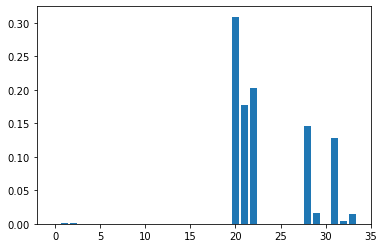

Attribute pat_geslacht_code has squared feature importance difference 3.4900175122279345e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 1.1642735154552603e-07
Attribute subloc_0 has squared feature importance difference 3.7070881866586003e-07
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 4.502853925621602e-09
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance dif

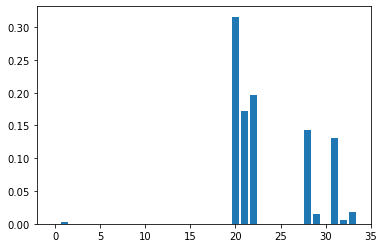

Attribute pat_geslacht_code has squared feature importance difference 7.410995903417109e-09
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.736999753815192e-06
Attribute subloc_0 has squared feature importance difference 5.360574577917008e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 5.103347519382338e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

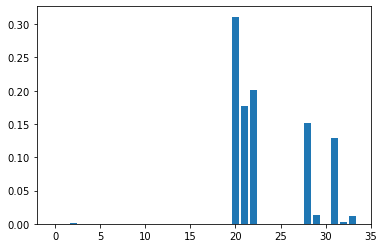

Attribute pat_geslacht_code has squared feature importance difference 9.601435532583487e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 1.2270684775603656e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 3.518103037216367e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

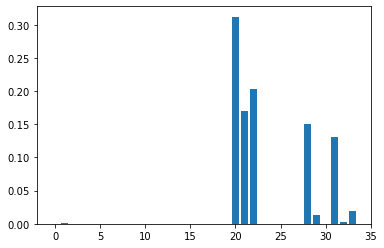

Attribute pat_geslacht_code has squared feature importance difference 5.287713102018191e-09
Attribute tum_differentiatiegraad_code has squared feature importance difference 5.063704413098871e-08
Attribute subloc_0 has squared feature importance difference 2.2461163362794803e-08
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 6.955975717967997e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

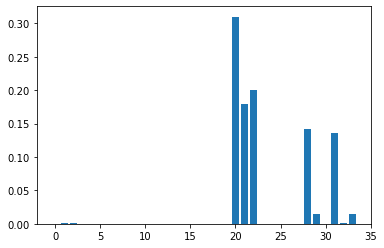

Attribute pat_geslacht_code has squared feature importance difference 9.046178448520378e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 9.699860978482718e-07
Attribute subloc_0 has squared feature importance difference 1.379913797425366e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

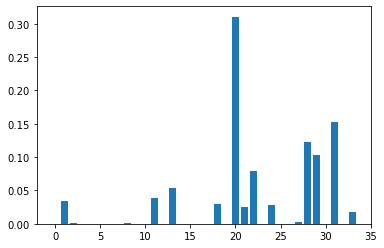

Attribute pat_geslacht_code has squared feature importance difference 6.390618476897008e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0010680257782957677
Attribute subloc_0 has squared feature importance difference 3.6243988696028054e-06
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 1.218119230144303e-07
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0015383262121258336
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared featur

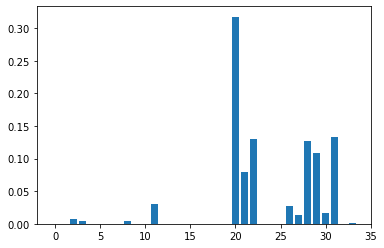

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 5.2723739827518594e-05
Attribute subloc_2 has squared feature importance difference 1.5036646214962329e-05
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 1.860142603576195e-05
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.000922822300677752
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A 

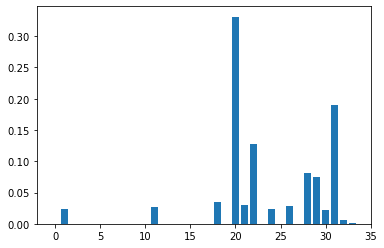

Attribute pat_geslacht_code has squared feature importance difference 5.501183870221675e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0005130739545111282
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0007364042221443054
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

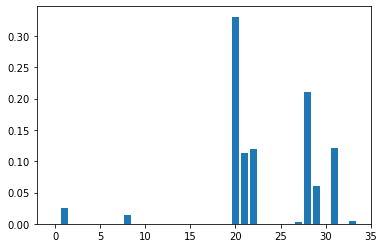

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0005991117156912947
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.00019433368986518747
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribut

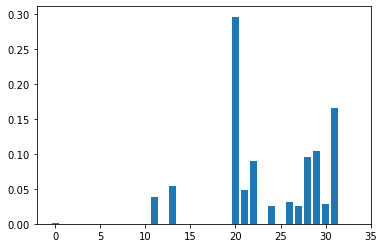

Attribute pat_geslacht_code has squared feature importance difference 2.6082751295282897e-07
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0014662055032077933
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance diffe

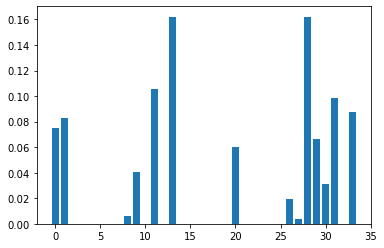

Attribute pat_geslacht_code has squared feature importance difference 0.005523872280401298
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.006695176333067223
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 3.229481022139385e-05
Attribute subloc_8 has squared feature importance difference 0.0016300829757815666
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.011199151191480884
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature im

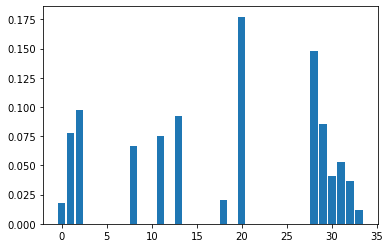

Attribute pat_geslacht_code has squared feature importance difference 0.0003117770002562737
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.005880202022852099
Attribute subloc_0 has squared feature importance difference 0.009464259342389512
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.004417808006462864
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.005684268355479635
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature imp

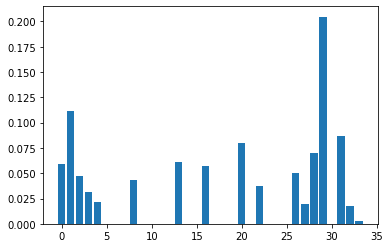

Attribute pat_geslacht_code has squared feature importance difference 0.0034714919411270783
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.0123345192389014
Attribute subloc_0 has squared feature importance difference 0.0021888081889814112
Attribute subloc_2 has squared feature importance difference 0.0009761253036026941
Attribute subloc_3 has squared feature importance difference 0.0004595779083386436
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.0018361102966596328
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has 

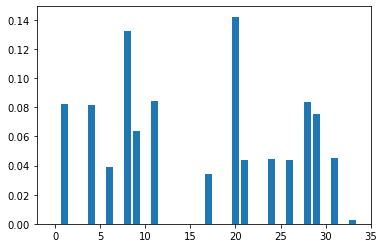

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.006639192720771932
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.006713477417562941
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0015272621041153929
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.01749796658077989
Attribute subloc_8 has squared feature importance difference 0.004077516479753713
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.007132618491889932
Attribute stage_2 has squared feature importance difference 0.0
Attribut

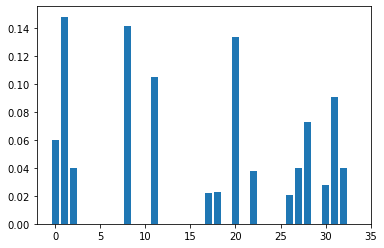

Attribute pat_geslacht_code has squared feature importance difference 0.0035722038266516177
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.02160979595335119
Attribute subloc_0 has squared feature importance difference 0.0016071823376540362
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.01983609745689547
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.010945399452302938
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature impo

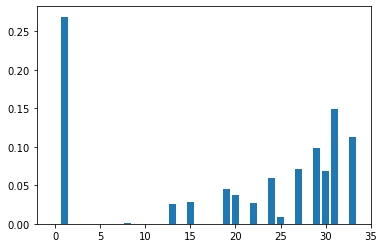

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.07172550229436217
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.342664042655764e-09
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0006298321486

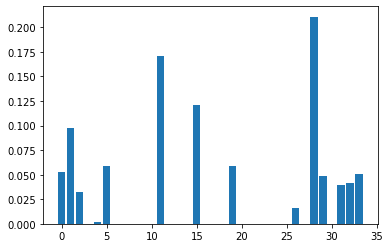

Attribute pat_geslacht_code has squared feature importance difference 0.0027893623308237283
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.009343764790388747
Attribute subloc_0 has squared feature importance difference 0.0010405540251639744
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 1.8254401172275995e-06
Attribute subloc_4 has squared feature importance difference 0.0034551475041147417
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.029069875224876803
Attribute stage_2 has squared feature importance difference 0.0
Att

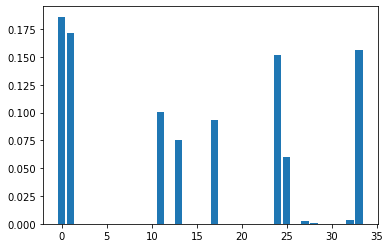

Attribute pat_geslacht_code has squared feature importance difference 0.03451894037535855
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.029002180835239418
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.010152682492556298
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference

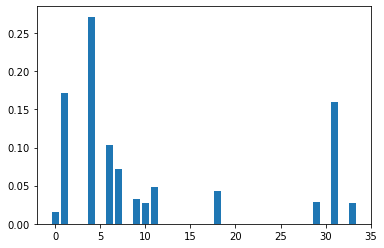

Attribute pat_geslacht_code has squared feature importance difference 0.00024062578603616469
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.029220773110774076
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.07367054810454081
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.010703880832722876
Attribute subloc_6 has squared feature importance difference 0.005213280261803979
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0010776805811360556
Attribute subloc_9 has squared feature importance difference 0.0007382968096621995
Attribute stage_1 has squared feature importance difference 0.0022987006079481084
Attribute stage_2 has squared feat

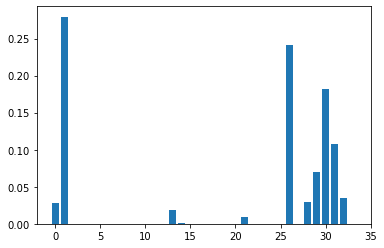

Attribute pat_geslacht_code has squared feature importance difference 0.0007345026913931176
Attribute tum_differentiatiegraad_code has squared feature importance difference 0.07756183000310293
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 8.116400913561607e-08
Attribute subloc_8 has squared feature importance difference 6.869870468758549e-09
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differen

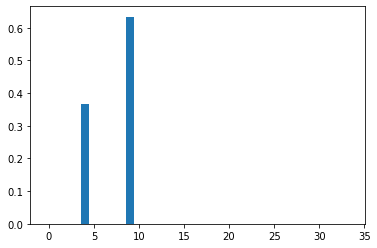

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.13429071159558595
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.4013767695926086
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature impo

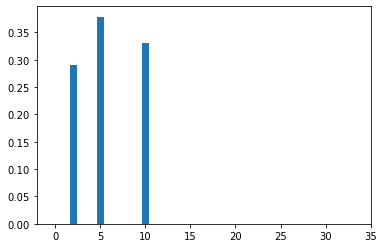

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.08404589167802161
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.14350130644139095
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.10974487631622018
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squ

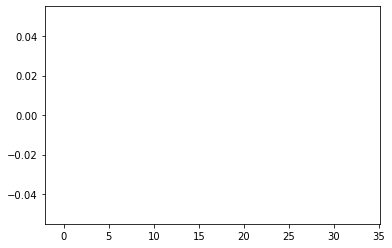

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance difference 0.0
Attribute

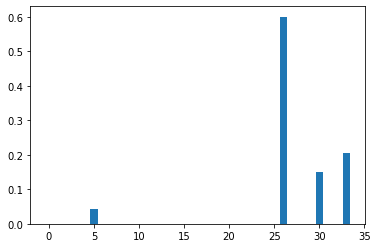

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.0
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.0018295879523396526
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 9.297330553612869e-08
Attribute subloc_8 has squared feature importance difference 0.0
Attribute subloc_9 has squared feature importance difference 0.0
Attribute stage_1 has squared feature importance difference 0.0
Attribute stage_2 has squared feature importance difference 0.0
Attribute stage_2A has squared feature importance differ

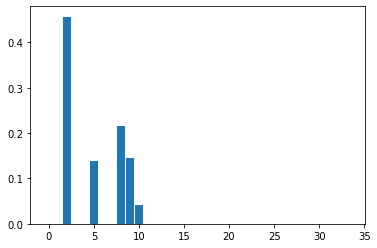

Attribute pat_geslacht_code has squared feature importance difference 9.603980750631779e-08
Attribute tum_differentiatiegraad_code has squared feature importance difference 8.067568757681588e-07
Attribute subloc_0 has squared feature importance difference 0.20839245874032353
Attribute subloc_2 has squared feature importance difference 0.0
Attribute subloc_3 has squared feature importance difference 0.0
Attribute subloc_4 has squared feature importance difference 0.019349043300224886
Attribute subloc_5 has squared feature importance difference 0.0
Attribute subloc_6 has squared feature importance difference 0.0
Attribute subloc_7 has squared feature importance difference 0.046661684437677396
Attribute subloc_8 has squared feature importance difference 0.02129197842122041
Attribute subloc_9 has squared feature importance difference 0.0017658879949300932
Attribute stage_1 has squared feature importance difference 4.4298706566767237e-10
Attribute stage_2 has squared feature importance diff

In [14]:
# Do for one DP algorithm at a time for normalized coefficients
privacy_levels = pb_privacy_levels

norm_pb_FID_ORI, norm_pb_FID, norm_pb_FID_ERRORS = NormalizedFIDmodels(models, df_ori, privacy_levels, df_ori_val, dropdummies=None, num_vars=num_vars)

In [15]:
labels = ['very low', 'low', 'medium', 'high', 'very high']

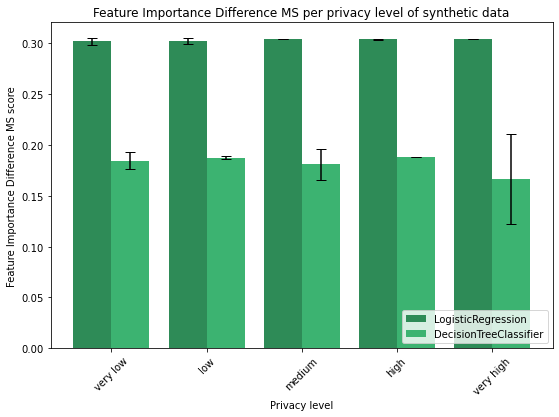

In [16]:
QMbar_one_DP_alg(QM=ms_FID, QMerror = ms_FID_ERRORS, QMname='Feature Importance Difference MS', labels=labels)

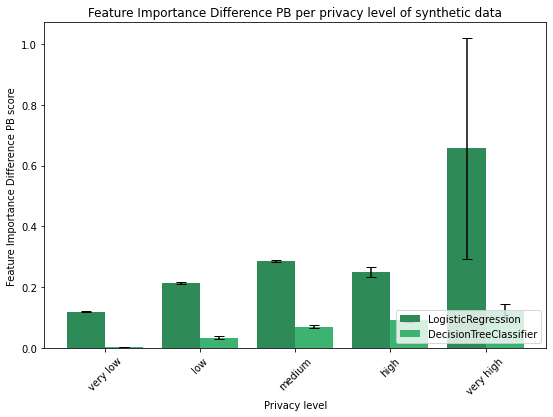

In [17]:
QMbar_one_DP_alg(QM=pb_FID, QMerror = pb_FID_ERRORS, QMname='Feature Importance Difference PB', labels=labels)

# Combined visualization

In [18]:
QM_FID_ori = ms_FID_ORI+pb_FID_ORI
QM_FID = ms_FID+pb_FID
QM_FID_error = ms_FID_ERRORS+pb_FID_ERRORS

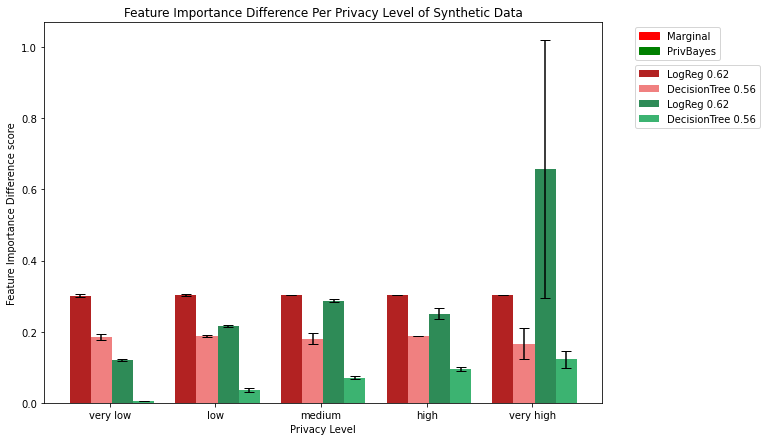

In [19]:
fig = QMbar_two_DP_algs(QM=QM_FID, QMerror = QM_FID_error, QMname='Feature Importance Difference', QMori = QM_FID_ori, labels=labels)
fig.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result Feature Importance Difference-subset_2.png', bbox_inches='tight', dpi=100)

In [20]:
# Normalized combined visualization
norm_QM_FID_ori = norm_ms_FID_ORI+norm_pb_FID_ORI
norm_QM_FID = norm_ms_FID+norm_pb_FID
norm_QM_FID_error = norm_ms_FID_ERRORS+norm_pb_FID_ERRORS

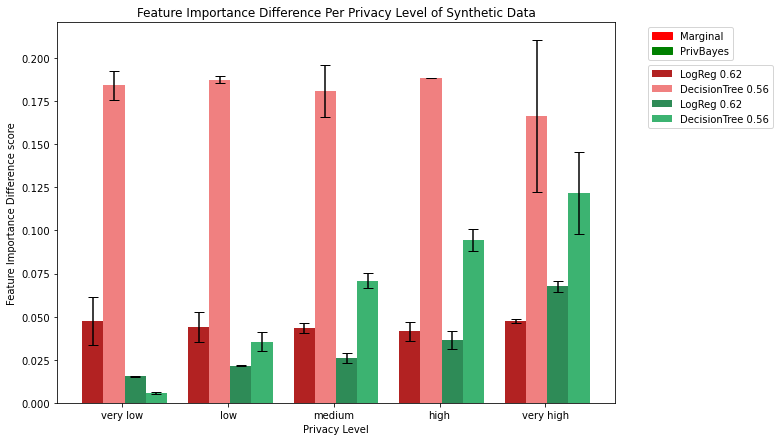

In [21]:
fig = QMbar_two_DP_algs(QM=norm_QM_FID, QMerror = norm_QM_FID_error, QMname='Feature Importance Difference', QMori = norm_QM_FID_ori, labels=labels)
fig.savefig('C:\\Users\\bde2002.53381\\Desktop\\master-thesis\\experiments\\evaluation_results\\Final Result Normalized Feature Importance Difference-subset_2.png', bbox_inches='tight', dpi=100)